<h1>Big Mart Sales</h1>

<h3>Introduccion</h3>

* El objetivo es construir un modelo de regresión simple para predecir las ventas por producto de
una tienda en particular, que forma parte de una cadena de tiendas, y descubrir cuáles son los
principales factores que influencian dicha predicción.

* Principales librerías o módulos:

    * Scikit-Learn. Está orientada principalmente a la predicción.

    * Statsmodels. Mayor funcionalidades en relación a estadísticos.

        * Aunque el approach de data science generalmente no es estudiar las estimaciones de los parámetros, sino la predicción del target como tal.




<h3>Supuestos del Modelo de Regresión Lineal</h3>

* La regresión lineal asume que los datos deben cumplir los siguientes supuestos, que se verifican analizando el patron de distribución de los residuos:

    * Linealidad: La relación entre la variable dependiente (Y) y la variable independiente (X) debe ser lineal
    * Normalidad de los residuos: Los residuos deben tener una distribución normal.
    * Homogeneidad de la varianza de los residuos: Los residuos deben tener una varianza constante (homocedasticidad).
    * Independencia de los residuos: Los residuos deben ser independientes los unos de los otros, no deben estar correlacionados entre sí.
    * No Multicolinealidad entre variables independientes.




<h3>Librerías o paquetes</h3>

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import sqrt

#preprocessing
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression


#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr
from scipy import stats


#ML models
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge , ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

<h1>Exploratory Data Analysis </h1>

<h3>First look </h3>

In [211]:
#Comenzamos por leer los CSV files
df_train = pd.read_csv('./csv files/Train_BigMart.csv')
df_test=pd.read_csv('./csv files/Test_BigMart.csv')



In [212]:
df_train=df_train.rename(columns={'Unnamed: 0':'Item_Identifier'}) #No es el Index, toma distintos valores,
                                                                   
df_train.head() #primeros 5 rows (registros)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
0           FDA15         9.30          Low Fat         0.016047  \
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier   
0                  Dairy  249.8092            OUT049  \
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
0                       1999      Medium               Tier 1  \
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [213]:
df_test.head() #primeros 5 rows del df_test

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type   
0           FDW58       20.750          Low Fat         0.007565  Snack Foods  \
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size   
0  107.8622            OUT049                       1999      Medium  \
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [214]:
print(f'Las columnas son: \n {df_train.columns}')
print(f'La cantidad de columnas son: {len(df_train.columns)}')
print(f'La dimensión del Train set es: {df_train.shape}')
print(f'El Target es: Item_Outlet_Sales')
print('##################################################################')
print(f'Las columnas son: \n {df_test.columns}')
print(f'La cantidad de columnas son: {len(df_test.columns)}')
print(f'La dimensión del Test Set es: {df_test.shape}')

Las columnas son: 
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
La cantidad de columnas son: 12
La dimensión del Train set es: (8523, 12)
El Target es: Item_Outlet_Sales
##################################################################
Las columnas son: 
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
La cantidad de columnas son: 11
La dimensión del Test Set es: (5681, 11)


In [215]:
df_train.describe() #veo medidas de variables numéricas:
                    #media, mediana, cuartiles, valor mínimo, máximo,etc

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year   
count  7060.000000      8523.000000  8523.000000                8523.000000  \
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [216]:
df_test.describe() #veo medidas de variables numéricas:
                    #media, mediana, cuartiles, valor mínimo, máximo,etc

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [217]:
df_train.info() #cantidad de null values y dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [218]:
df_test.info() #cantidad de null values y dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [219]:
df_train.isnull().sum()   #Item Weight y Outlet Size tienen null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [220]:
df_test.isnull().sum()    #Item Weight y Outlet Size tienen null values

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [221]:
#Ambos dos datasets tienen los mismos features con null values

print("""--------------Relación entre valores nulos de Item_Weight y ----------------------
                    cantidad de valores de Item_Weight \n""")
print(f"df_train: {df_train['Item_Weight'].isnull().sum()/len(df_train['Item_Weight'])}")

print(f"df_test:  {df_test['Item_Weight'].isnull().sum()/len(df_test['Item_Weight'])}")

print('######'*15)
print("""--------------Relación entre valores nulos de Outlet_Size y ----------------------
                    cantidad de valores de Outlet_Size \n""")
print(f"df_train: {df_train['Outlet_Size'].isnull().sum()/len(df_train['Outlet_Size'])}")

print(f"df_test:  {df_test['Outlet_Size'].isnull().sum()/len(df_test['Outlet_Size'])}")


--------------Relación entre valores nulos de Item_Weight y ----------------------
                    cantidad de valores de Item_Weight 

df_train: 0.1716531737651062
df_test:  0.17180073930646014
##########################################################################################
--------------Relación entre valores nulos de Outlet_Size y ----------------------
                    cantidad de valores de Outlet_Size 

df_train: 0.2827642848762173
df_test:  0.28269670832599897


In [222]:
df_train[df_train.duplicated()] #no duplicated rows

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

In [223]:
df_test[df_test.duplicated()] #no duplicated rows

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []

* Hay 12 columnas (11 features y 1 target en el Train set)
* Item_Identifier no es el Index, es una categoría. Lo chequeé haciendo value_counts(), lo saqué para no hacerlo tan extenso.
*  No hay registros duplicados (no hay rows duplicadas).
*  La relación de los únicos valores nulos de los dos datasets es igual

<h3>Second Look</h3>

<h4> El Target</h4>

Para profundizar el análisis primero observaremos el Target(variable respuesta,variable dependiente) y su distribución. 

In [224]:
df_train[['Item_Outlet_Sales']].describe()

Item_Outlet_Sales
count        8523.000000
mean         2181.288914
std          1706.499616
min            33.290000
25%           834.247400
50%          1794.331000
75%          3101.296400
max         13086.964800

A simple vista podemos ver que el target no tiene una distribución normal, ya que la mediana (50%) y la media(mean) divergen. Lo comprobamos de manera gráfica:

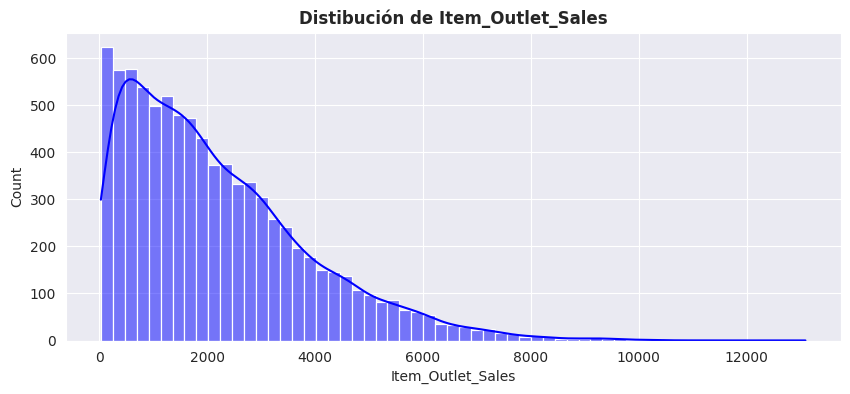

In [225]:
plt.figure(figsize=(10, 4))
plt.title('Distibución de Item_Outlet_Sales',weight='12',fontweight='bold')
sns.histplot(data=df_train,x='Item_Outlet_Sales',kde=True,color='blue')
plt.show()

QQ-Plot nos permite ver que tan cerca está la distribución de lavariable dependiente de la distribución variable normal

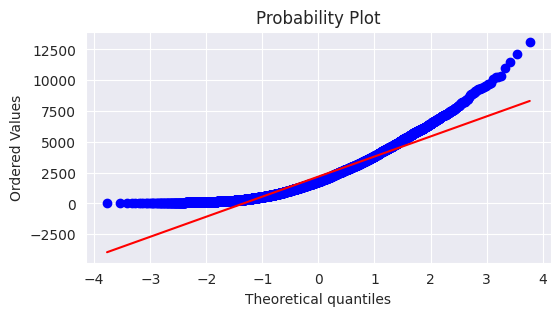

In [226]:
plt.figure(figsize=(6, 3))
fig = stats.probplot(df_train['Item_Outlet_Sales'],plot=plt)
plt.show()

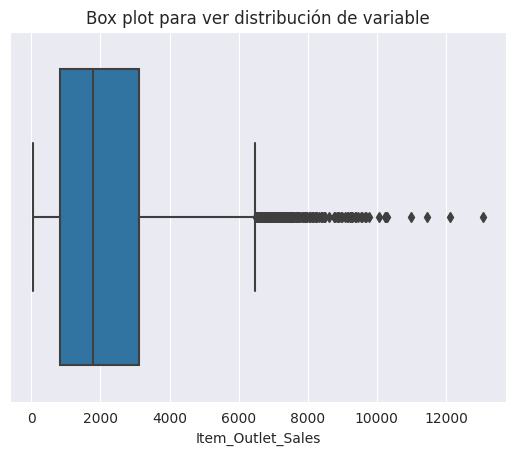

In [227]:
plt.title('Box plot para ver distribución de variable')
sns.boxplot(data=df_train,x='Item_Outlet_Sales')
plt.show()

<h5>Outliers</h5>

Item_MRP es la variable que más correlaciona con el target. Los dos valores extremos, los voy a eliminar. (Esto lo vimos posteriormente pero es preciso verlo en este momento)
Acá también hubo un chequeo con respecto a si había valores más bajos de ITEM_MRP con respecto a Item_Outlet_Sales.
También se podría haber hecho una variable categórica con Item_MRP ya que se pueden ver Clusters en el gráfico.

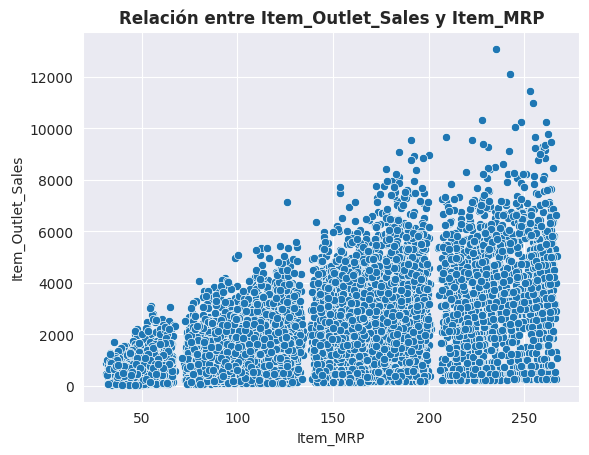

In [228]:
plt.title('Relación entre Item_Outlet_Sales y Item_MRP',weight='12',fontweight='bold')
sns.scatterplot(data=df_train,x='Item_MRP',y='Item_Outlet_Sales')
plt.show()

In [229]:
upper_values= df_train.nlargest(2,'Item_Outlet_Sales')

upper_values

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
7188           NCE42          NaN          Low Fat         0.010551  \
5223           FDQ19          NaN          Regular         0.014296   

                  Item_Type  Item_MRP Outlet_Identifier   
7188              Household  234.9958            OUT027  \
5223  Fruits and Vegetables  242.6512            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
7188                       1985      Medium               Tier 3  \
5223                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7188  Supermarket Type3         13086.9648  
5223  Supermarket Type3         12117.5600

In [230]:
df_train.drop(upper_values.index,inplace=True) #elimino valores máximos


df_train = df_train.reset_index(drop=True)


<h5>Asimetría y Curtosis del Target</h5>

In [231]:
print(f"Coeficiente de Asimetría:  {df_train['Item_Outlet_Sales'].skew()}")
print(f"Curtosis:  {df_train['Item_Outlet_Sales'].kurt()}")

Coeficiente de Asimetría:  1.142864521790182
Curtosis:  1.3667965539213283


* El sesgo o asimetría (Skewness) sirve para medir la asimetría de la distribución del Target.
Como se puede observar en el gráfico, el target tiene una asimetría positiva, con cola hacia la derecha. A su vez, esto se puede observar ya que el resultado del coeficiente de Asimetría es positivo.
* Curtosis: Una curtosis positiva indica que los datos muestran más valores atípico extremos que una distribución normal. Distribución Leptocúrtica.


Está muy lejos de la normalidad. Esto nos va a ocasionar problemas a la hora de aplicar una regresión lineal. 
Recordamos que hay algunos supuestos que cumplir:

* Linealidad : Relación lineal entre variable independiente e independiente. (Gráfico)

* No Multicolinealidad: baja relación entre variables independientes(Heatmap Corr())
 coeficiente de pearson
   Tolerancia =1 -r2score(coeficiente de determinación) r2score
    Multicolinealidad existe si Tolerancia < 0.1
   Variation Inflation Factor 1 / (1-r2score)

* Homoscedasticidad, la varianza de los residuales debe ser constante a través de los valores predichos.

    El supuesto de homogeneidad de varianzas, también conocido como supuesto de homocedasticidad, considera que la varianza es constante (no varía) en los diferentes niveles de un factor, es decir, entre diferentes grupos. En los modelos de regresión lineal, esta condición de homocedasticidad suele hacer referencia a los errores (residuos) del modelo, es decir, que la varianza de los errores es constante en todas las predicciones. Cuando la condición de homocedasticidad no se cumple, se utiliza el término heterocedasticidad.

* Normalidad de los residuales: 
    * Gráfico Quantil-Quatil (Q-Q plot) Se utiliza para saber si los residuos usan una distribución Normal.
     * Histograma

* No autocorrelación de los errores

Vemos, a su vez, que es una técnica utilizada transformar el target(que siga una distribución normal) para que ajuste mejor la linealidad.
https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

<h5>Transformación del Target</h5>

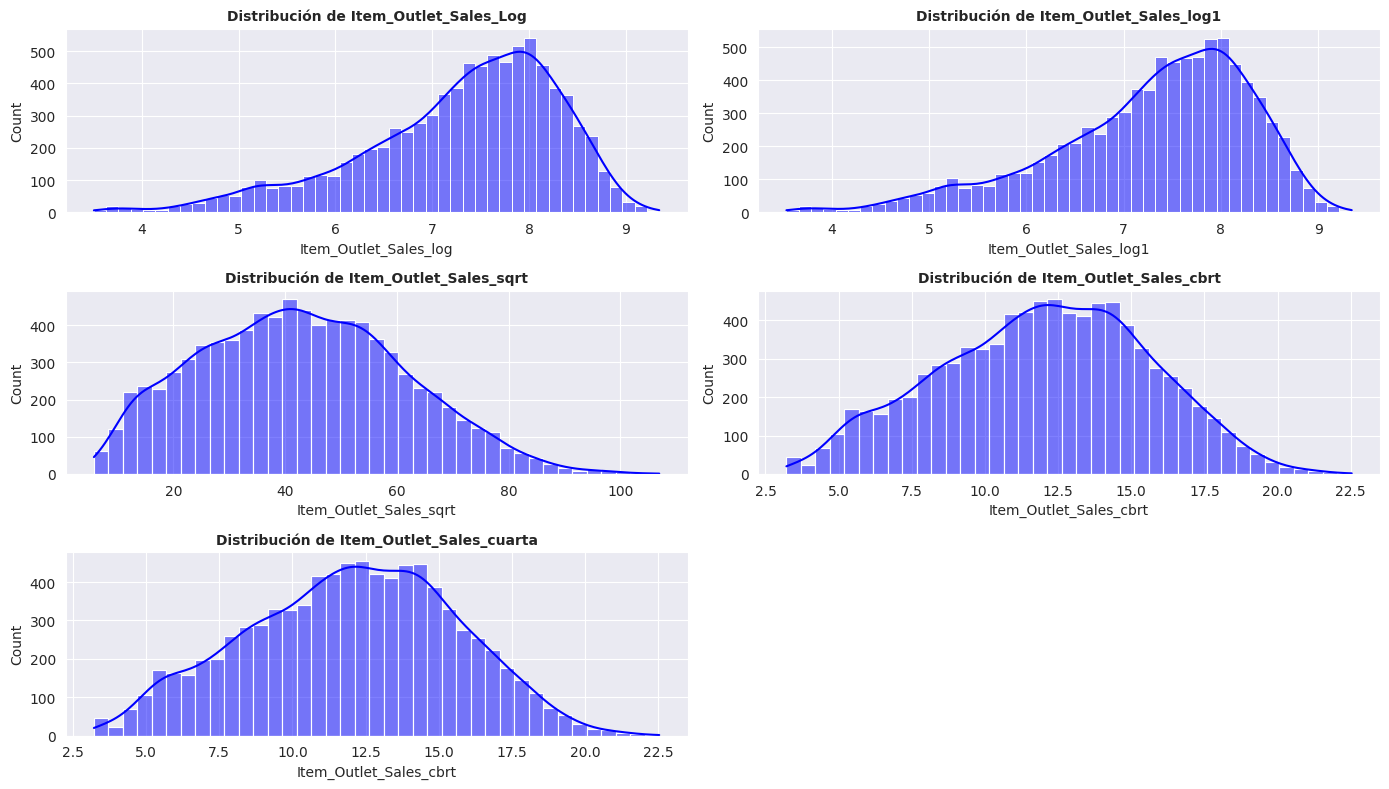

In [232]:
df_train['Item_Outlet_Sales_log'] =np.log(df_train['Item_Outlet_Sales'])
df_train['Item_Outlet_Sales_log1'] =np.log1p(df_train['Item_Outlet_Sales'])
df_train['Item_Outlet_Sales_sqrt'] =np.sqrt(df_train['Item_Outlet_Sales'])
df_train['Item_Outlet_Sales_cbrt'] =np.cbrt(df_train['Item_Outlet_Sales'])
df_train['Item_Outlet_Sales_cuarta'] =np.power(df_train['Item_Outlet_Sales'],1/4)


fig, ax= plt.subplots(nrows=3, ncols=2, figsize=(14,8))

sns.histplot(data=df_train,x='Item_Outlet_Sales_log',kde=True,color='blue',ax=ax[0,0])
ax[0,0].set_title('Distribución de Item_Outlet_Sales_Log',size=10,weight='bold')

sns.histplot(data=df_train,x='Item_Outlet_Sales_log1',kde=True,color='blue',ax=ax[0,1])
ax[0,1].set_title('Distribución de Item_Outlet_Sales_log1',size=10,weight='bold')

sns.histplot(data=df_train,x='Item_Outlet_Sales_sqrt',kde=True,color='blue',ax=ax[1,0])
ax[1,0].set_title('Distribución de Item_Outlet_Sales_sqrt',size=10,weight='bold')

sns.histplot(data=df_train,x='Item_Outlet_Sales_cbrt',kde=True,color='blue',ax=ax[1,1])
ax[1,1].set_title('Distribución de Item_Outlet_Sales_cbrt',size=10,weight='bold')

sns.histplot(data=df_train,x='Item_Outlet_Sales_cbrt',kde=True,color='blue',ax=ax[2,0])
ax[2,0].set_title('Distribución de Item_Outlet_Sales_cuarta',size=10,weight='bold')

fig.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

In [233]:
print(f"Coeficiente de Asimetría:  {df_train['Item_Outlet_Sales_cbrt'].skew()}")
print(f"Curtosis:  {df_train['Item_Outlet_Sales_cbrt'].kurt()}")

Coeficiente de Asimetría:  -0.10799676403996784
Curtosis:  -0.5449209024071737


In [234]:
print(f"Coeficiente de Asimetría:  {df_train['Item_Outlet_Sales_cuarta'].skew()}")
print(f"Curtosis:  {df_train['Item_Outlet_Sales_cuarta'].kurt()}")

Coeficiente de Asimetría:  -0.28609916164684174
Curtosis:  -0.4494359191446087


In [235]:
df_train.drop(columns=['Item_Outlet_Sales_sqrt','Item_Outlet_Sales_log','Item_Outlet_Sales_log1',
                       'Item_Outlet_Sales_cbrt','Item_Outlet_Sales_cuarta'],inplace=True)

In [236]:
df_train['Item_Outlet_Sales'] =np.cbrt(df_train['Item_Outlet_Sales'])

#cbrt #sqrt #log #log1p #np.power (raiz cuarta)

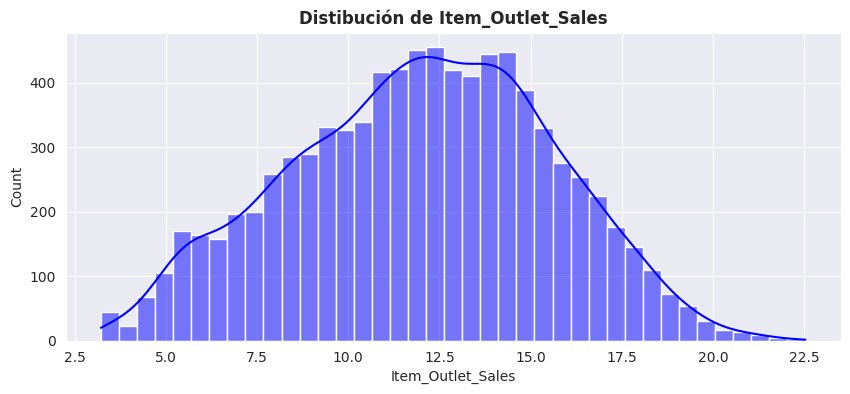

In [237]:
plt.figure(figsize=(10, 4))
plt.title('Distibución de Item_Outlet_Sales',weight='12',fontweight='bold')
sns.histplot(data=df_train,x='Item_Outlet_Sales',kde=True,color='blue')
plt.show()

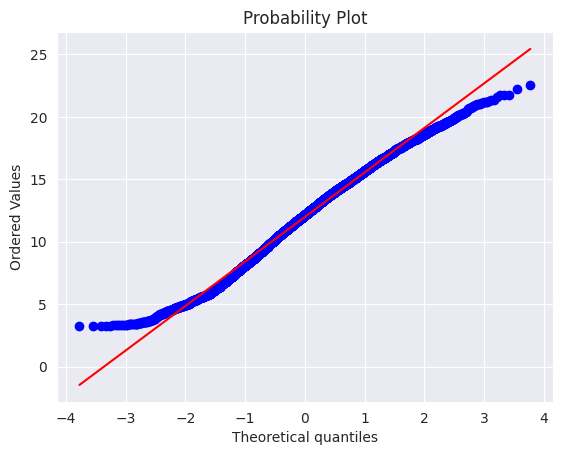

In [238]:
fig = stats.probplot(df_train['Item_Outlet_Sales'],plot=plt)
plt.show()

In [239]:
print(f"Coeficiente de Asimetría de target modificado:  {df_train['Item_Outlet_Sales'].skew()}")
print(f"Curtosis modificada:  {df_train['Item_Outlet_Sales'].kurt()}")

Coeficiente de Asimetría de target modificado:  -0.10799676403996784
Curtosis modificada:  -0.5449209024071737


<h4>Numerical features</h4>

In [240]:
#Seleccionamos las columnas de ambos datasets que son numéricas 
#y ponemos el [:-1] para evitar el target del train set
num_cols_train = df_train.select_dtypes(include=np.number).columns[:-1] 
num_cols_test = df_test.select_dtypes(include=np.number).columns

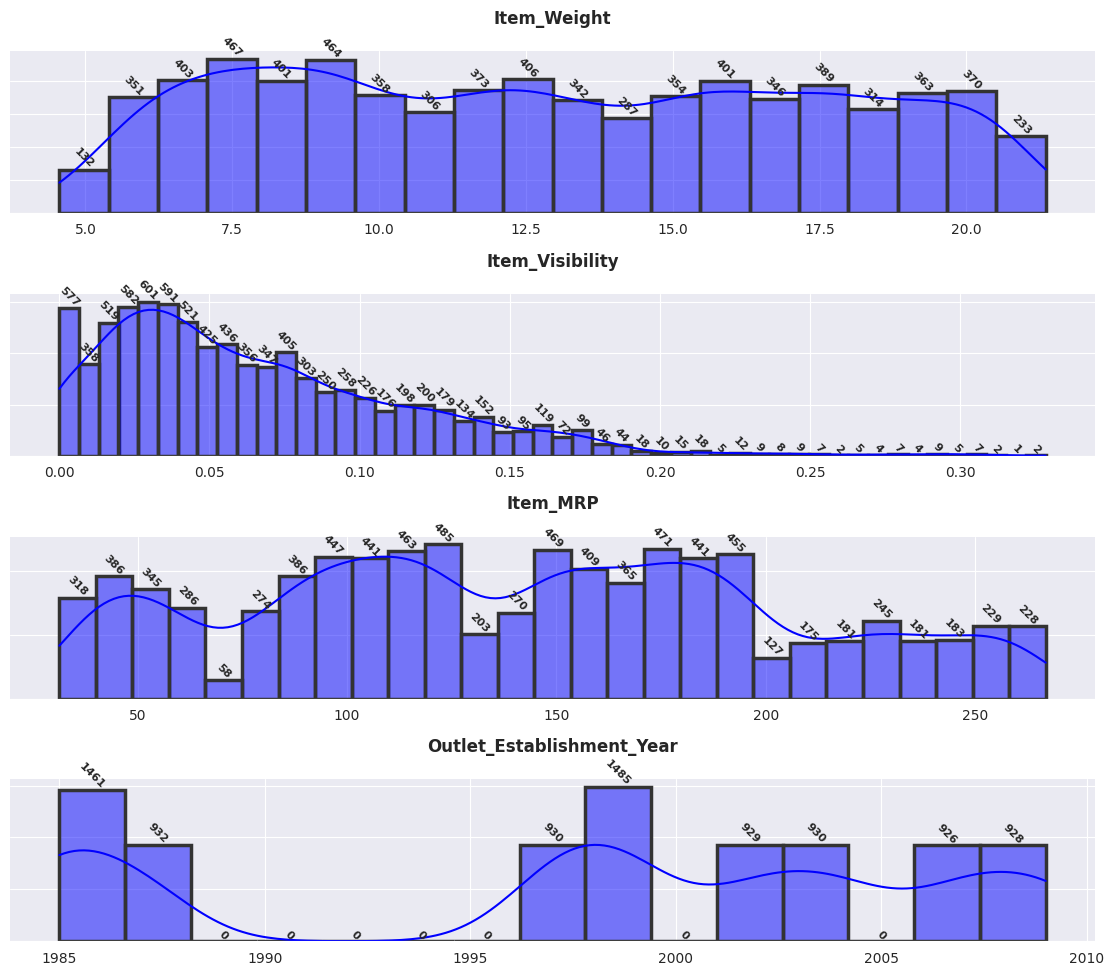

In [241]:
fig, axes = plt.subplots(4,1, figsize=(14,10))

fig.subplots_adjust(hspace=.5,top =1, wspace=.175)

for ax, col in zip(axes.flat,num_cols_train):
    sns.histplot(data=df_train, x=col,ax=ax,linewidth=2.5, edgecolor=".2",kde=True,color='blue')
    ax.spines[['top','left','right']].set_visible(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(labelleft=False, left=False,labelsize=10)
    ax.set_title(col,fontweight="bold",pad=20)
    for i in ax.containers:
        ax.bar_label(i,fontsize=8,fontweight="bold",rotation=-45);

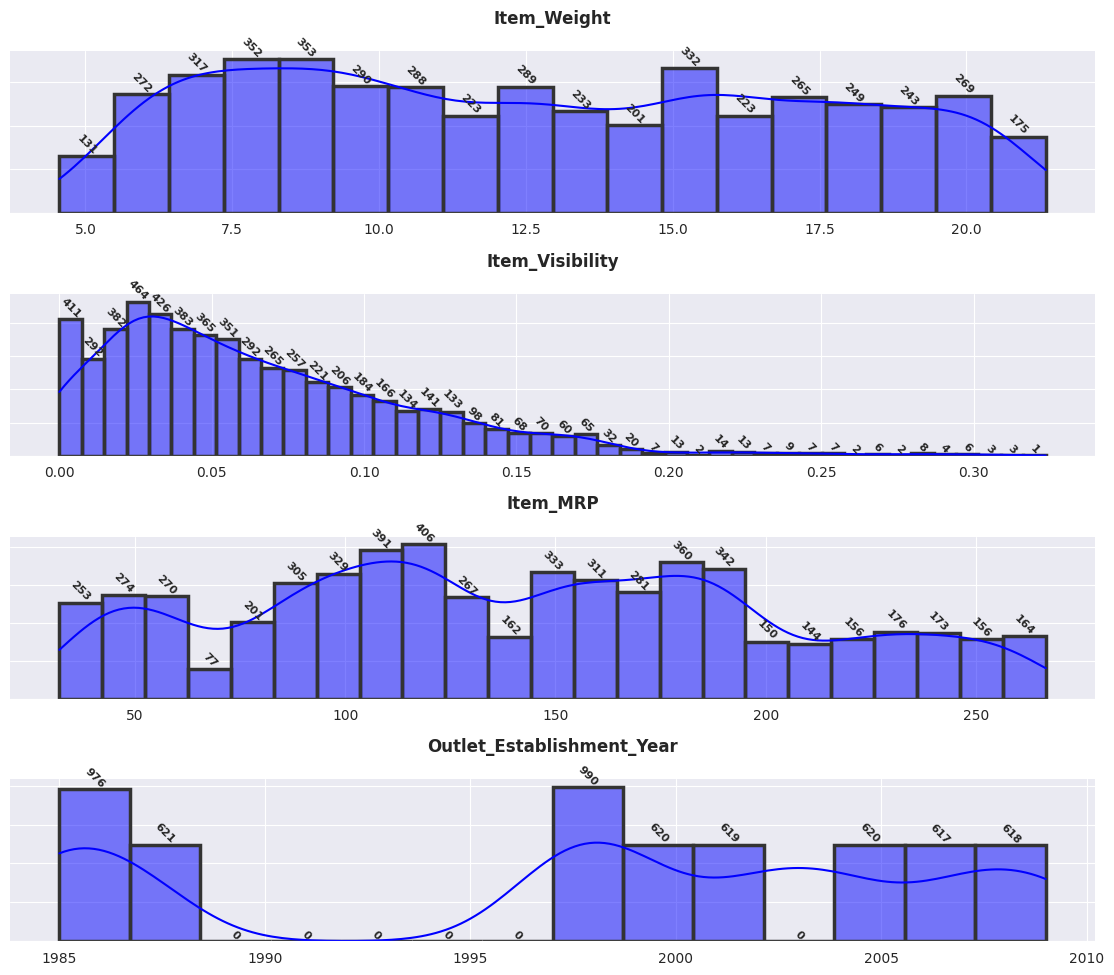

In [242]:
fig, axes = plt.subplots(4,1, figsize=(14,10))

fig.subplots_adjust(hspace=.5,top =1, wspace=.175)

for ax, col in zip(axes.flat,num_cols_test):
    sns.histplot(data=df_test, x=col,ax=ax,linewidth=2.5, edgecolor=".2",kde=True,color='blue')
    ax.spines[['top','left','right']].set_visible(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(labelleft=False, left=False,labelsize=10)
    ax.set_title(col,fontweight="bold",pad=20)
    for i in ax.containers:
        ax.bar_label(i,fontsize=8,fontweight="bold",rotation=-45);

La distribución de las variables numéricas de ambos datasets son similares. Ninguna variable tiene distribución normal.

<h5>Relación de los features y el target</h5>

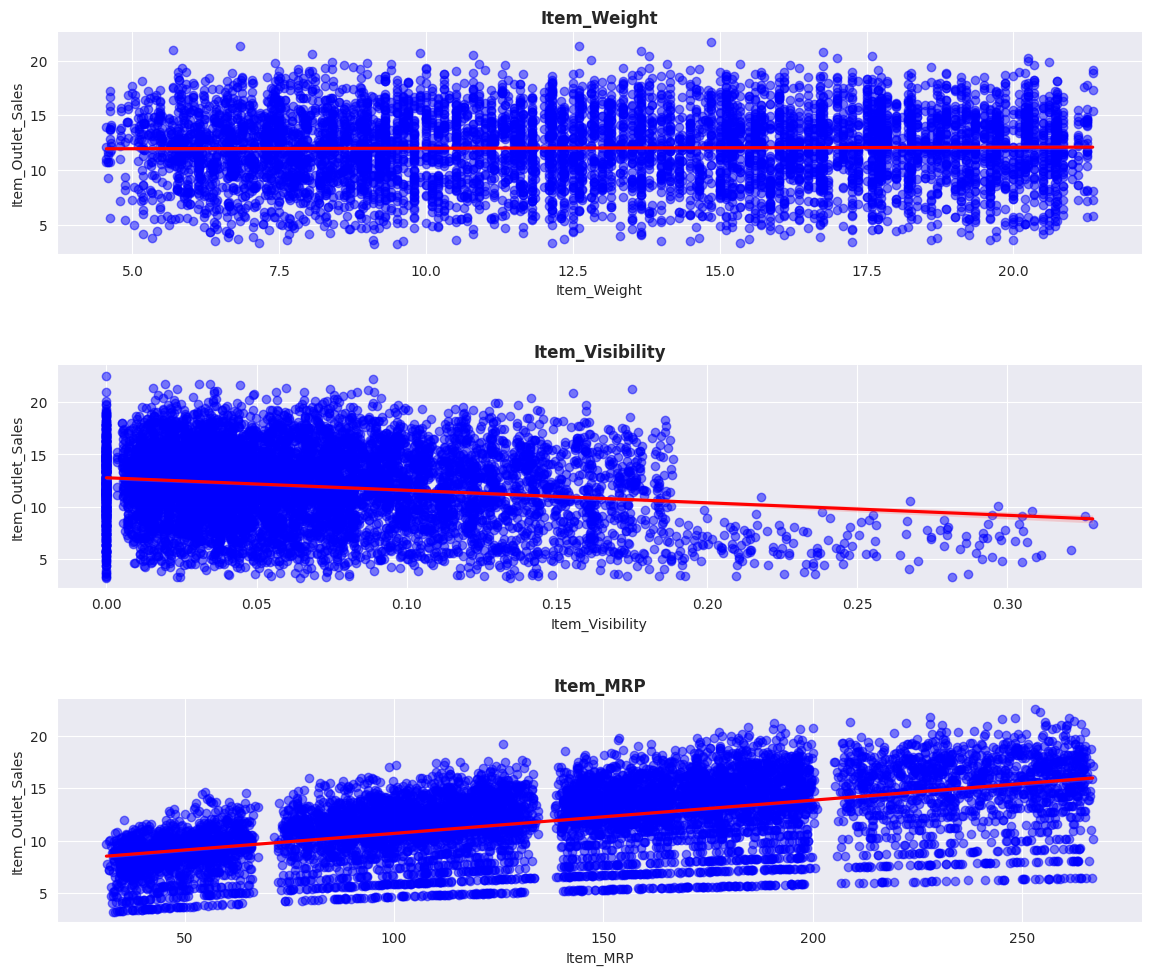

In [243]:
cols= ['Item_Weight', 'Item_Visibility', 'Item_MRP']

fig, axes = plt.subplots(3,1, figsize=(14,10))

fig.subplots_adjust(hspace=.5,top =1, wspace=.175)

for ax, col in zip(axes.flat,cols):
    ax.spines[['top','right']].set_visible(False)
    #sns.scatterplot(data=df_train, x=col,y='Item_Outlet_Sales',ax=ax)
    sns.regplot(data=df_train,x=col,y='Item_Outlet_Sales',ax=ax,scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})
    ax.set_title(col,fontweight="bold")

* Lo primero a tener en cuenta es que Item_Weight tiene null values, por lo tanto, todavía no me atrevo a desecharla. En el gráfico la recta es la recta es = la media de Y.
* Y a simple vista Item_MRP es el feature que más se relaciona con el target. 
* También hay que tener en cuenta que la relación entre Item_Visibility y el target va decreciendo y luego tiene una caída abrupta. Quizás sería interesante poner una variable interviniente gráficamente para ver que sucede. 
* Pero también cabe aclarar que en esta variable figura que los productos más vendidos tienen 0 visibilidad. Esto es raro. 

In [244]:
df_train['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.107037      2
0.061271      2
0.046825      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7878, dtype: int64

In [245]:
df_test['Item_Visibility'].value_counts()

Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

Estamos en lo cierto, hay 526 y 353 veces aparece la ocurrencia 0. Que es la única que tiene gran cantidad de valores. Voy a imputarle el valor media sobre los 2 datasets. Son pocos valores en relación al total de registros para hacer una columna categórica con ['Unknown Visibility','Known Visibility']. Lo que está mal es que, teniendo visibilidad 0, tenga ventas.

In [246]:
visibility_mean_value = round(pd.concat([df_train['Item_Visibility'],df_test['Item_Visibility']],axis=0).mean(),6)

visibility_mean_value

0.06596

In [247]:
df_train['Item_Visibility']=df_train['Item_Visibility'].replace(0,visibility_mean_value)
df_test['Item_Visibility']=df_test['Item_Visibility'].replace(0,visibility_mean_value)

<h5>Outlet_Establishment_Year</h5>

En realidad este feature (o variable independiente) la consideramos como una variable categórica, ya que de esta manera nos va a poder dar más información. En un principio, pensé en pasar la variable numérica a datetime, luego pensé en hacer intérvalos con el cut method, pero la variable iba a quedar muy imbalanceada si tomaba por década. 

Pero considero que hacer OneHotEncoder nos va a dar mejores resultados, ya que no es una variable ordinal.

In [248]:
#la distribución cuenta con 9 categorias en la variable(feature with 9 values)

df_train['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1461
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [249]:
#La distribución, en proporción, es similar al Train set.
#Al observar esto vemos que ambos datasets son bastantes similares, lo mismo sucedió con los null values.
df_test['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: count, dtype: int64

In [250]:
#Transformamos el feature(o variable independiente) a object type, el feature engineering va luego.
df_train['Outlet_Establishment_Year'] = df_train['Outlet_Establishment_Year'].astype(str)
df_test['Outlet_Establishment_Year'] = df_test['Outlet_Establishment_Year'].astype(str)

<h4>Categorical features</h4>

Son 8 columnas categóricas:

In [251]:
df_train.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

* Item_Identifier

In [252]:
df_train['Item_Identifier'].value_counts() #no es un valor único

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDK57     1
FDE52     1
FDY43     1
DRF48     1
FDO33     1
Name: count, Length: 1559, dtype: int64

In [253]:
df_test['Item_Identifier'].value_counts() #no es un valor unico.

Item_Identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: count, Length: 1543, dtype: int64

Item_Identifier no es un valor único y en este caso tiene distinta longitud la cantidad de distintas ocurrencias de los valores. Creamos dos columnas nuevas para ver si estas nos dicen más información con respecto a los items. 
Considero que puede ser distinta empresa las 3 primeras letras y los número un distinto producto. Pero en caso contrario, es una característica de un producto. Cabe aclarar, que sería mejor para tener un mejor análisis saber más acerca de este feature.

In [254]:
df_train['Letter_Item_Identifier'] =df_train['Item_Identifier'].str[0:3] #creo nuevas variables
df_test['Letter_Item_Identifier'] =df_test['Item_Identifier'].str[0:3]

In [255]:
df_train['Number_Item_Identifier'] =df_train['Item_Identifier'].str[3:] #creo nuevas variables

df_test['Number_Item_Identifier'] =df_test['Item_Identifier'].str[3:]

In [256]:
print(f'Cantidad valores únicos de Number_Item_Identifier \n en el Train set es de: {len(df_train["Number_Item_Identifier"].unique())} \n en el Test set es de: {len(df_test["Number_Item_Identifier"].unique())}')
print('#######'*10)
print(f'Cantidad valores únicos de Letter_Item_Identifier \n en el Train set es de: {len(df_train["Letter_Item_Identifier"].unique())} \n en el Test set es de: {len(df_test["Letter_Item_Identifier"].unique())}')

Cantidad valores únicos de Number_Item_Identifier 
 en el Train set es de: 60 
 en el Test set es de: 60
######################################################################
Cantidad valores únicos de Letter_Item_Identifier 
 en el Train set es de: 71 
 en el Test set es de: 71


Tiene mismo cantidad de values en ambos datasets. 

Ploteamos:

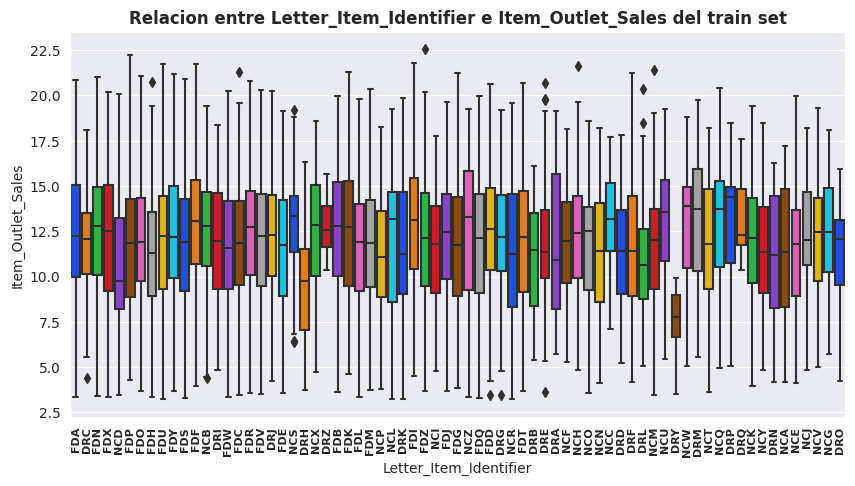

In [257]:
plt.figure(figsize=(10, 5))
plt.title('Relacion entre Letter_Item_Identifier e Item_Outlet_Sales del train set',size=12,fontweight='bold')

sns.boxplot(data=df_train,x='Letter_Item_Identifier',y='Item_Outlet_Sales',palette='bright')
sns.set_style('darkgrid')
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

In [258]:
#Cambio el valor de la columna para tener ordenados los datos

df_train['Number_Item_Identifier'] = pd.to_numeric(df_train['Number_Item_Identifier'])
df_test['Number_Item_Identifier'] = pd.to_numeric(df_test['Number_Item_Identifier'])

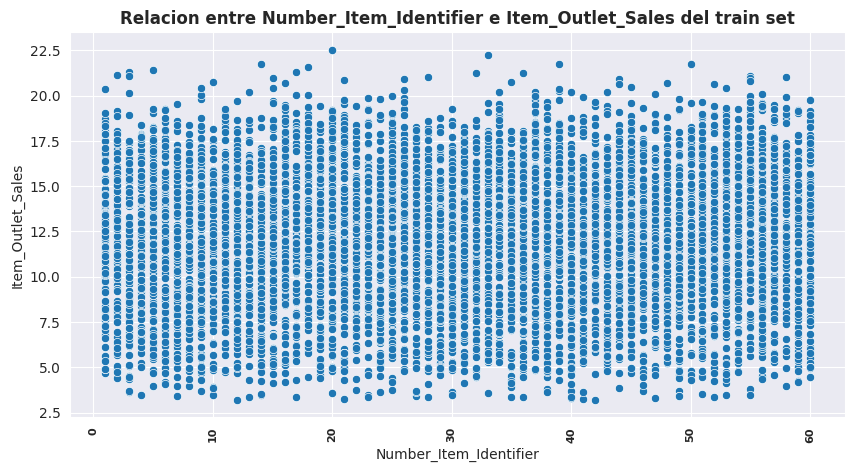

In [259]:
plt.figure(figsize=(10, 5))
plt.title('Relacion entre Number_Item_Identifier e Item_Outlet_Sales del train set',size=12,fontweight='bold')
sns.scatterplot(data=df_train,x='Number_Item_Identifier',y='Item_Outlet_Sales',)
sns.set_style('darkgrid')
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

In [260]:
fig=px.scatter(df_train,x='Number_Item_Identifier',y='Item_Outlet_Sales',color='Letter_Item_Identifier',
               title="Relación entre Letter_Item_Identifier e Item_Outlet_Sales según Number_Item_Identifier")

fig.show()

![Relación entre Letter_Item_Identifier e Item_Outlet_Sales según Number_Item_Identifier](newplot.png)


Cruce ambas variables nuevas introducidas entre si con el Target para saber si había alguna relación. Use Plotly.Express, ya que tiene una interfaz interactiva, la cual me permite ver todas las categorias de la variable interviniente. Se observó que Number_Item_Identifier no hay ninguna relación lineal(es decir, el numero 2 no tiene más ventas que el 1 necesariamente), la variable independiente no modifica la variable independiente.

* Item_Fat_Content

Rápidamente nos dimos cuenta que eran 2 categorías de la variable.

In [261]:
#LF es low fat, reg es Regular y low fat es Low Fat
df_train['Item_Fat_Content'].replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'},inplace=True)

df_test['Item_Fat_Content'].replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'},inplace=True)

df_train['Item_Fat_Content'].value_counts() #distribución de la variable

Item_Fat_Content
Low Fat    5516
Regular    3005
Name: count, dtype: int64

Grafiqué para saber la relación que tiene con el Target.

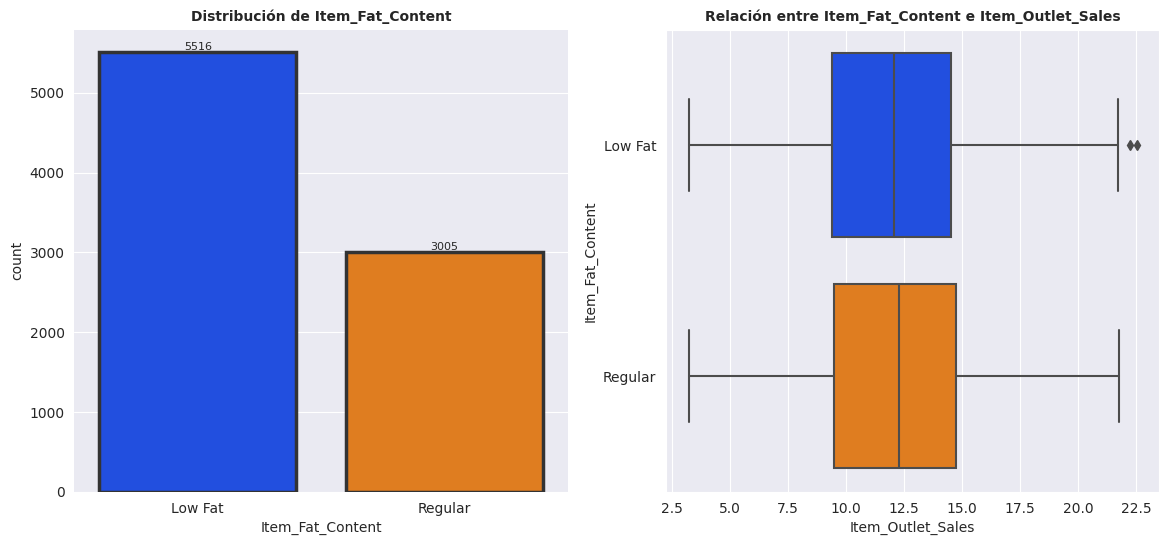

In [262]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(14,6))


sns.countplot(data=df_train,ax=ax[0],x='Item_Fat_Content',linewidth=2.5, edgecolor=".2",palette='bright')
ax[0].set_title('Distribución de Item_Fat_Content',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);
#ax[0].set_ylabel(None)


sns.boxplot(data=df_train,ax=ax[1],y='Item_Fat_Content',x='Item_Outlet_Sales',palette='bright')
ax[1].set_title('Relación entre Item_Fat_Content e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')

plt.show()

Es una variable nominal dicotómica que presenta una diferencia considerable en su distribución, pero cuando se relacionan ambos valores del feature con el target, pareciera ser que no hay una diferencia considerable. Por eso, optamos por eliminarla.

In [263]:
print(df_test['Item_Fat_Content'].value_counts()[0]/len(df_test['Item_Fat_Content']))
print(df_train['Item_Fat_Content'].value_counts()[0]/len(df_train['Item_Fat_Content']))

0.645660975180426
0.6473418612838868


In [264]:
df_train.drop(columns=['Item_Fat_Content'],inplace=True)
df_test.drop(columns=['Item_Fat_Content'],inplace=True)


* Item_Type

En el ejercicio ofrecido hay ciertas asunciones:

La primera de ellas consiste en que el Item Type es fuertemente influyente con el tipo de ventas. 

¿Productos de ventas generales se venden más que Bebidas Alcohólicas?

In [265]:
df_train['Item_Type'].value_counts() #distribución de la variable

Item_Type
Fruits and Vegetables    1231
Snack Foods              1200
Household                 909
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

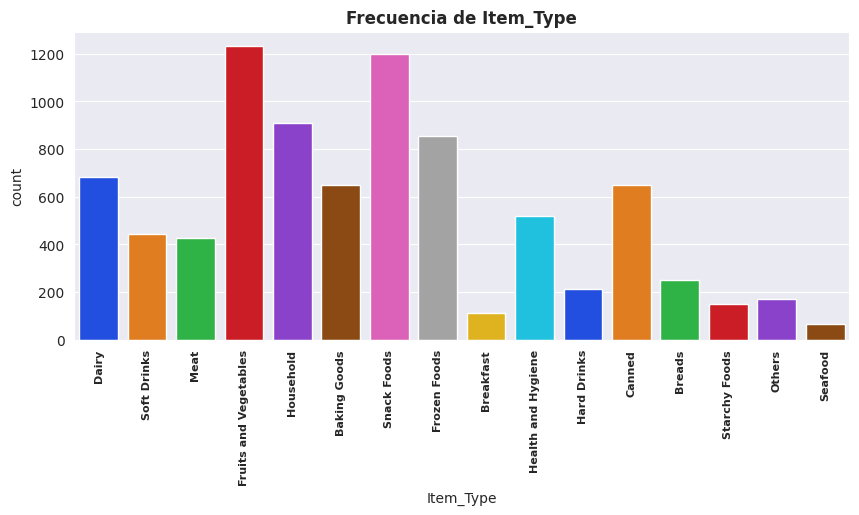

In [266]:
plt.figure(figsize=(10, 4))
plt.title('Frecuencia de Item_Type',size=12,fontweight='bold')
sns.countplot(data=df_train,x='Item_Type',palette='bright') #important feature?
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

#Acá plotee también el test set, pero lo saqué para que no ocupe tanto espacio. La distribución es similar.

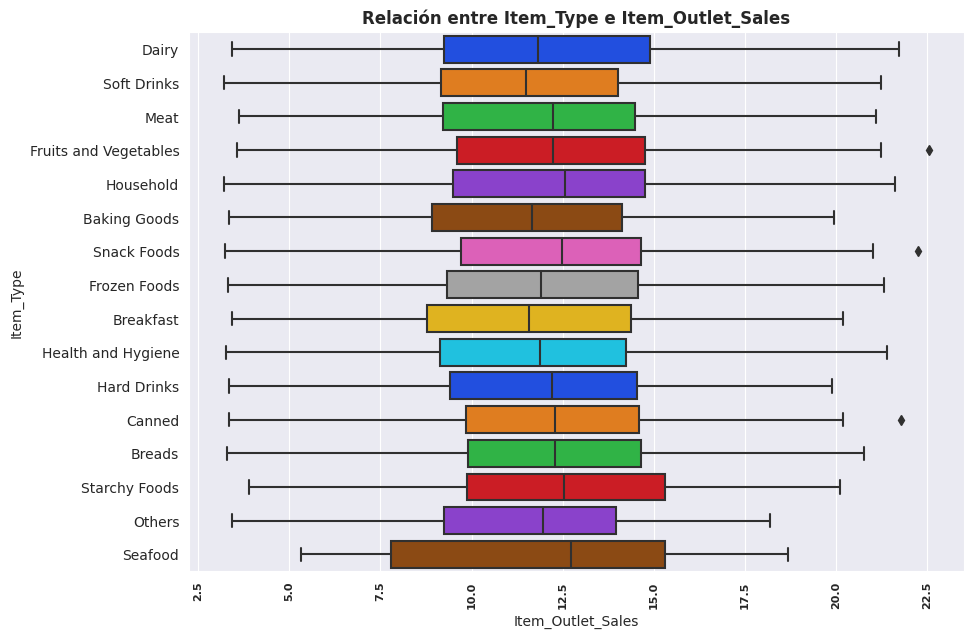

In [267]:
plt.figure(figsize=(10, 7))
plt.title('Relación entre Item_Type e Item_Outlet_Sales',size=12,fontweight='bold')
sns.boxplot(data=df_train,y='Item_Type',x='Item_Outlet_Sales',palette='bright')
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

Hard Drinks no tiene los valores más altos de la distribución. Hay Outliers que no me atrevo a sacar debido a que el Test set está bastante parecido.

* Outlet_Identifier

In [268]:
df_train['Outlet_Identifier'].value_counts() #distribución de la variable

Outlet_Identifier
OUT027    933
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

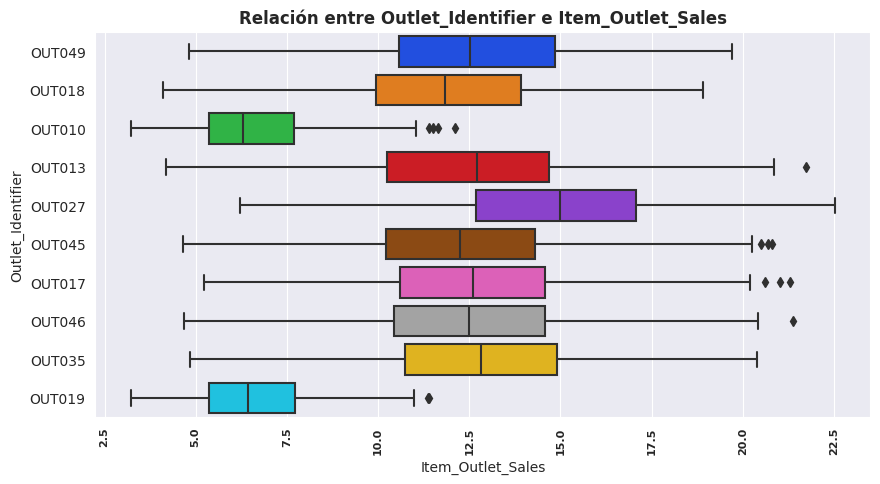

In [269]:
plt.figure(figsize=(10, 5))
plt.title('Relación entre Outlet_Identifier e Item_Outlet_Sales',size=12,fontweight='bold')
sns.boxplot(data=df_train,y='Outlet_Identifier',x='Item_Outlet_Sales',palette='bright')
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

* Outlet Size

In [270]:
df_train['Outlet_Size'].value_counts() #2410 null values, más de 1/4 del total

Outlet_Size
Medium    2791
Small     2388
High       932
Name: count, dtype: int64

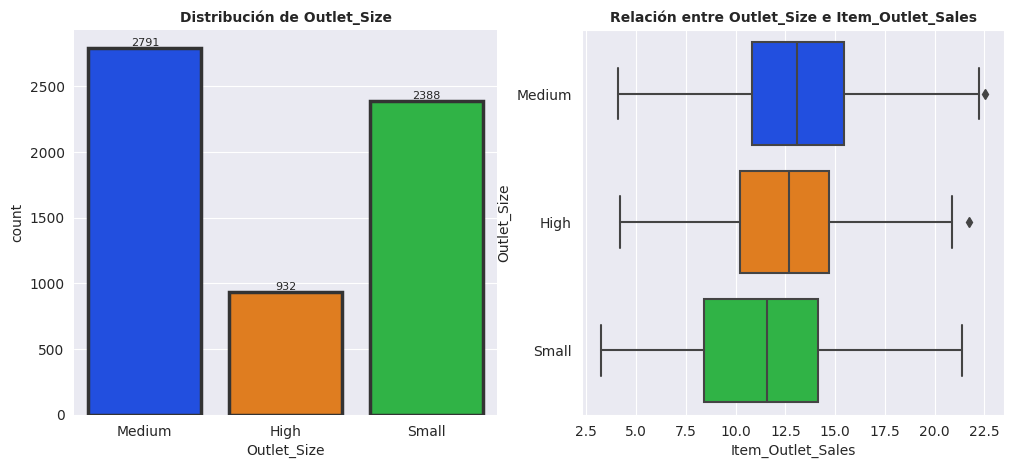

In [271]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(data=df_train,ax=ax[0],x='Outlet_Size',linewidth=2.5, edgecolor=".2",palette='bright')
ax[0].set_title('Distribución de Outlet_Size',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);
#ax[0].set_ylabel(None)


sns.boxplot(data=df_train,ax=ax[1],y='Outlet_Size',x='Item_Outlet_Sales',palette='bright')
ax[1].set_title('Relación entre Outlet_Size e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')

plt.show()

Recordamos que esta variable tiene null Values, al ser resueltas posteriormente. 

En este caso, Outlet_Size presenta variación en sus valores con respecto a Item_Outlet_Sales,posible linealidad.

* Outlet_Location_Type

Sería mejor saber que implican los distintos valores de la variable para poder profundizar mejor el análisis.

In [272]:
df_train['Outlet_Location_Type'].value_counts() #ubicacion

Outlet_Location_Type
Tier 3    3348
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

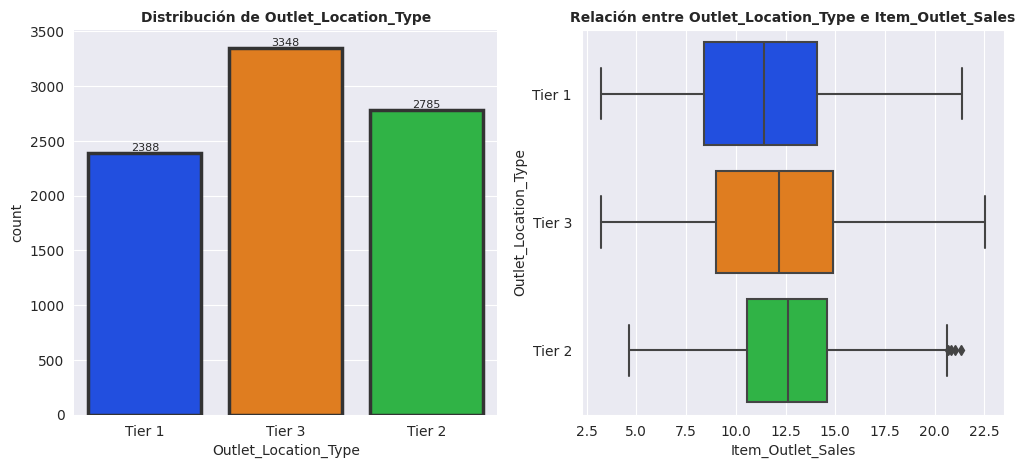

In [273]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(data=df_train,ax=ax[0],x='Outlet_Location_Type',linewidth=2.5, edgecolor=".2",palette='bright')
ax[0].set_title('Distribución de Outlet_Location_Type',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);



sns.boxplot(data=df_train,ax=ax[1],y='Outlet_Location_Type',x='Item_Outlet_Sales',palette='bright')
ax[1].set_title('Relación entre Outlet_Location_Type e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')

plt.show()



Presenta linealidad.

* Outlet_Type

Este es un feature que nos ayudara en el proceso para obtener los null values.

In [274]:
df_train['Outlet_Type'].value_counts() #Tipo de negocio 
                                        #Nos falta información con respecto a que es un Supermarket Type 1,2,3

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     933
Supermarket Type2     928
Name: count, dtype: int64

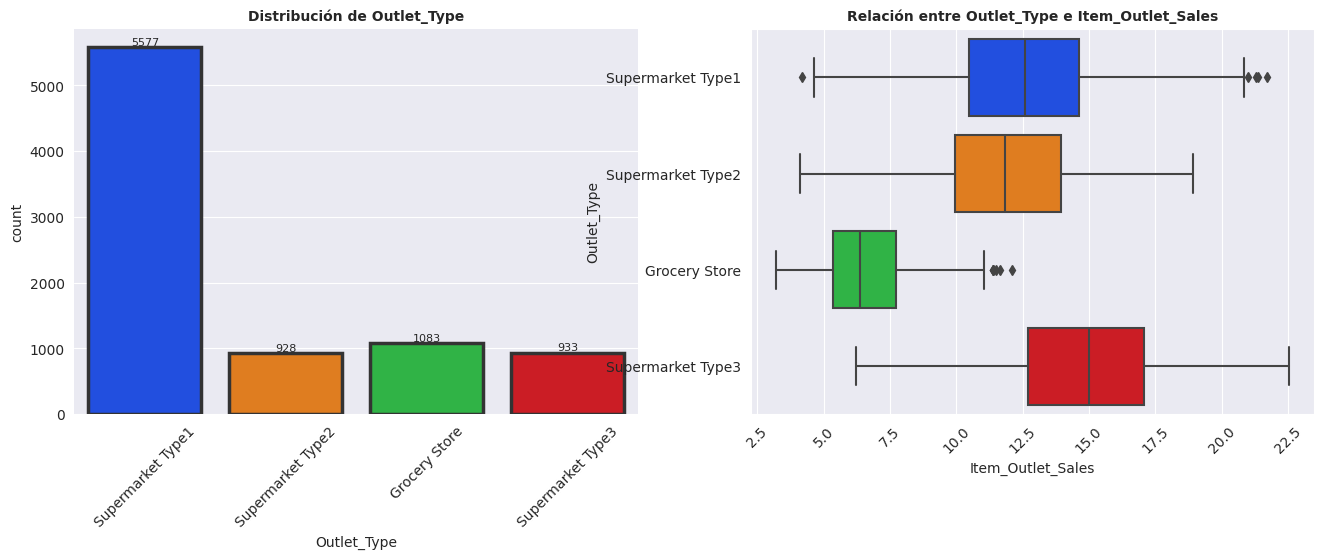

In [275]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(16,5))


sns.countplot(data=df_train,ax=ax[0],x='Outlet_Type',linewidth=2.5, edgecolor=".2",palette='bright')
ax[0].set_title('Distribución de Outlet_Type',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].tick_params(axis='x', rotation=45)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);



sns.boxplot(data=df_train,ax=ax[1],y='Outlet_Type',x='Item_Outlet_Sales',palette='bright')
ax[1].set_title('Relación entre Outlet_Type e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')
ax[1].tick_params(axis='x', rotation=45)

plt.show()


* Outlet_Establishment_Year

Podría transformar el feature para la fecha de hoy haciendo 2023 menos el año en el que se estableció el Outlet, pero sería lo mismo para el análisis.

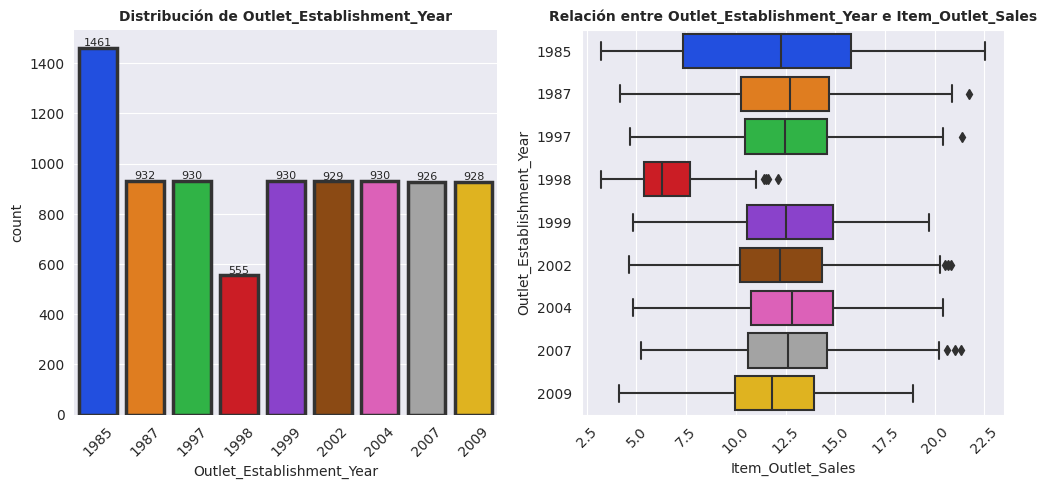

In [276]:
years_order= ['1985','1987','1997','1998','1999','2002','2004','2007','2009']

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(data=df_train,ax=ax[0],x='Outlet_Establishment_Year',linewidth=2.5, edgecolor=".2",order= years_order,palette='bright')
ax[0].set_title('Distribución de Outlet_Establishment_Year',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].tick_params(axis='x', rotation=45)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);



sns.boxplot(data=df_train,ax=ax[1],y='Outlet_Establishment_Year',x='Item_Outlet_Sales',order=years_order,palette='bright')
ax[1].set_title('Relación entre Outlet_Establishment_Year e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

<h3>Feature Engineering</h3>

<h5>Dealing with Null Values</h5>

Como se pudo ver al principio, hay 2 categorias que tienen null values:

* Una variable categórica: Outlet_Size.

* Una variable numérica continua: Item_Weight.



* Outlet_Size

Al analizar el Dataset, parto de una intuición que quizás nos pueda dar una pista. Outlet_Type tiene una categoría que se llama Grocery_Store (lo que sería un almacén en Castellano),entonces pienso que puede tener algún sentido ver si hay alguna coincidencia entre las categorias de las 2 variables. A su vez, entiendo que quizás sea más difícil de precisar que tipo de Outlet_Size tiene un Grocery Store en el momento de la carga del dato,lo cual sería un problema.

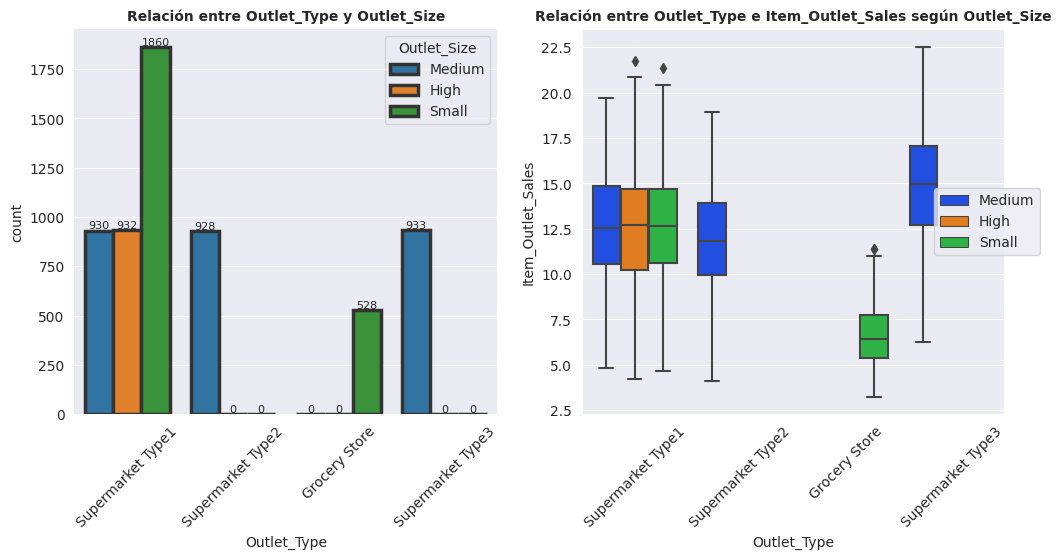

In [277]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.countplot(data=df_train,ax=ax[0],x='Outlet_Type',hue='Outlet_Size',linewidth=2.5, edgecolor=".2")
ax[0].set_title('Relación entre Outlet_Type y Outlet_Size',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].tick_params(axis='x', rotation=45)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);

sns.boxplot(data=df_train,ax=ax[1],x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',palette='bright')
ax[1].set_title('Relación entre Outlet_Type e Item_Outlet_Sales según Outlet_Size',size=10,fontweight='bold')
sns.set_style('darkgrid')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

Se confirma lo que decimos. El primer gráfico se puede observar que hay 528 Grocery Store==528 Small Stores. En el segundo gráfico lo vemos en relación al target. 
El pensamiento es el siguiente: tenemos Null Values en el feature Outlet_Size. Todos los Grocery Store son Small, vamos a ver si cuando buscamos grocery stores en el feature Outlet_Type, vemos si hay null values en la variable Outlet_Size. 

Acá descubrimos que también hay en Supermarket Type2 y Supermarket Type 3 un solo valor,podríamos hacer el mismo procedimiento. Estaría bueno tener más información sobre las características de los valores de la variable Outlet_Type.


In [278]:

# Hay 555 casos en los que cuando se cumple la condición Outlet_Type== Grocery Store, en Outlet_Size hay valores nulos.
df_train[(df_train['Outlet_Type']=='Grocery Store') & (df_train['Outlet_Size'].isna())]

Item_Identifier  Item_Weight  Item_Visibility              Item_Type   
3              FDX07       19.200         0.065960  Fruits and Vegetables  \
28             FDE51        5.925         0.161467                  Dairy   
30             FDV38       19.250         0.170349                  Dairy   
45             FDM39        6.420         0.089499                  Dairy   
65             FDC46       17.700         0.195068            Snack Foods   
...              ...          ...              ...                    ...   
8398           NCE07        8.180         0.021977              Household   
8430           FDI16       14.000         0.227261           Frozen Foods   
8471           DRI47       14.700         0.035016            Hard Drinks   
8484           FDR20       20.000         0.065960  Fruits and Vegetables   
8507           FDG45        8.100         0.214306  Fruits and Vegetables   

      Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size   
3     182.0950            OUT010                      1998         NaN  \
28     45.5086            OUT010                      1998         NaN   
30     55.7956            OUT010                      1998         NaN   
45    178.1002            OUT010                      1998         NaN   
65    185.4266            OUT010                      1998         NaN   
...        ...               ...                       ...         ...   
8398  140.6154            OUT010                      1998         NaN   
8430   54.3640            OUT010                      1998         NaN   
8471  144.3128            OUT010                      1998         NaN   
8484   46.4744            OUT010                      1998         NaN   
8507  213.9902            OUT010                      1998         NaN   

     Outlet_Location_Type    Outlet_Type  Item_Outlet_Sales   
3                  Tier 3  Grocery Store           9.013888  \
28                 Tier 3  Grocery Store           5.629799   
30                 Tier 3  Grocery Store           5.471331   
45                 Tier 3  Grocery Store           7.101913   
65                 Tier 3  Grocery Store           5.692126   
...                   ...            ...                ...   
8398               Tier 3  Grocery Store           7.521103   
8430               Tier 3  Grocery Store           5.426482   
8471               Tier 3  Grocery Store           7.556249   
8484               Tier 3  Grocery Store           3.564108   
8507               Tier 3  Grocery Store           7.517178   

     Letter_Item_Identifier  Number_Item_Identifier  
3                       FDX                       7  
28                      FDE                      51  
30                      FDV                      38  
45                      FDM                      39  
65                      FDC                      46  
...                     ...                     ...  
8398                    NCE                       7  
8430                    FDI                      16  
8471                    DRI                      47  
8484                    FDR                      20  
8507                    FDG                      45  

[555 rows x 13 columns]

In [279]:
df_train[(df_train['Outlet_Type']=='Grocery Store') & (df_train['Outlet_Size'].isna())]['Item_Outlet_Sales'].describe()

#veo la distribución de Item Outlet Sales en los Grocery Store donde Outlet Size son nulos

count    555.000000
mean       6.545750
std        1.698503
min        3.216903
25%        5.361645
50%        6.302466
75%        7.693665
max       12.109390
Name: Item_Outlet_Sales, dtype: float64

In [280]:
df_train[df_train['Outlet_Type']=='Grocery Store']['Item_Outlet_Sales'].describe()

#la distribución es similar del target

count    1083.000000
mean        6.565356
std         1.673468
min         3.216903
25%         5.357785
50%         6.357851
75%         7.712365
max        12.109390
Name: Item_Outlet_Sales, dtype: float64

In [281]:
#Ningun valor nulo para cuando Outlet_Type == Supermarket Type 2

df_train[(df_train['Outlet_Type']=='Supermarket Type2') & (df_train['Outlet_Size'].isna())]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales, Letter_Item_Identifier, Number_Item_Identifier]
Index: []

In [282]:
df_train[(df_train['Outlet_Type']=='Supermarket Type3') & (df_train['Outlet_Size'].isna())]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales, Letter_Item_Identifier, Number_Item_Identifier]
Index: []

Esto nos resuelve parte de la cuestión para transformar parte de los null values del feature. Chequeamos que esto suceda también en el test_Set.

In [283]:
#370 valores nulos en el test set que cumplan la condición dicha.
df_test[(df_test['Outlet_Type']=='Grocery Store') & (df_test['Outlet_Size'].isna())]

Item_Identifier  Item_Weight  Item_Visibility              Item_Type   
2              NCN55       14.600         0.099575                 Others  \
19             FDA46       13.600         0.196898            Snack Foods   
25             FDX22        6.785         0.038455            Snack Foods   
37             FDD48       10.395         0.050479           Baking Goods   
41             FDY19       19.750         0.069236  Fruits and Vegetables   
...              ...          ...              ...                    ...   
5571           FDI15       13.800         0.236595                  Dairy   
5572           NCH43        8.420         0.118118              Household   
5580           FDA23        9.800         0.078981           Baking Goods   
5650           FDC10        9.800         0.121982            Snack Foods   
5668           FDC44       15.600         0.288892  Fruits and Vegetables   

      Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size   
2     241.7538            OUT010                      1998         NaN  \
19    193.7136            OUT010                      1998         NaN   
25    209.4928            OUT010                      1998         NaN   
37    114.0176            OUT010                      1998         NaN   
41    116.6466            OUT010                      1998         NaN   
...        ...               ...                       ...         ...   
5571  265.0884            OUT010                      1998         NaN   
5572  216.9192            OUT010                      1998         NaN   
5580  100.1016            OUT010                      1998         NaN   
5650  119.7098            OUT010                      1998         NaN   
5668  115.1518            OUT010                      1998         NaN   

     Outlet_Location_Type    Outlet_Type Letter_Item_Identifier   
2                  Tier 3  Grocery Store                    NCN  \
19                 Tier 3  Grocery Store                    FDA   
25                 Tier 3  Grocery Store                    FDX   
37                 Tier 3  Grocery Store                    FDD   
41                 Tier 3  Grocery Store                    FDY   
...                   ...            ...                    ...   
5571               Tier 3  Grocery Store                    FDI   
5572               Tier 3  Grocery Store                    NCH   
5580               Tier 3  Grocery Store                    FDA   
5650               Tier 3  Grocery Store                    FDC   
5668               Tier 3  Grocery Store                    FDC   

      Number_Item_Identifier  
2                         55  
19                        46  
25                        22  
37                        48  
41                        19  
...                      ...  
5571                      15  
5572                      43  
5580                      23  
5650                      10  
5668                      44  

[370 rows x 12 columns]

In [284]:
df_test[(df_test['Outlet_Type']=='Supermarket Type2') & (df_test['Outlet_Size'].isna())]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Letter_Item_Identifier, Number_Item_Identifier]
Index: []

In [285]:
df_test[(df_test['Outlet_Type']=='Supermarket Type3') & (df_test['Outlet_Size'].isna())]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Letter_Item_Identifier, Number_Item_Identifier]
Index: []

Ambos datasets son similares, se cumple la condición igual que en el df_train. Por eso mismo procedemos a completar parte del dato faltante donde se cumplen las dos condiciones Outlet_Type=='Grocery Store' y Outlet_size es nulo, y a estos valores nulos los pasamos como Small. Sabemos que esto es un riesgo porque puede darse la colinealidad entre variables, pero consideramos que el pensamiento es el correcto.

In [286]:
#Chequea la condición Outlet_Type =='Grocery_Store' y Outlet_Size tenga null values, para retornar la columna Outlet_Size y a eso le pongo Small
#Transformamos esos 555 null values del primer dataset y 370 del test set.
df_train.loc[(df_train['Outlet_Type'] == 'Grocery Store') & (df_train['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

df_test.loc[(df_test['Outlet_Type'] == 'Grocery Store') & (df_test['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'


Esto no soluciona completamente la situación de los null values en el feature, por eso buscamos lo mismo con el resto de los features. Hasta que llegamos a que Outlet_Location_Type sucede lo mismo.

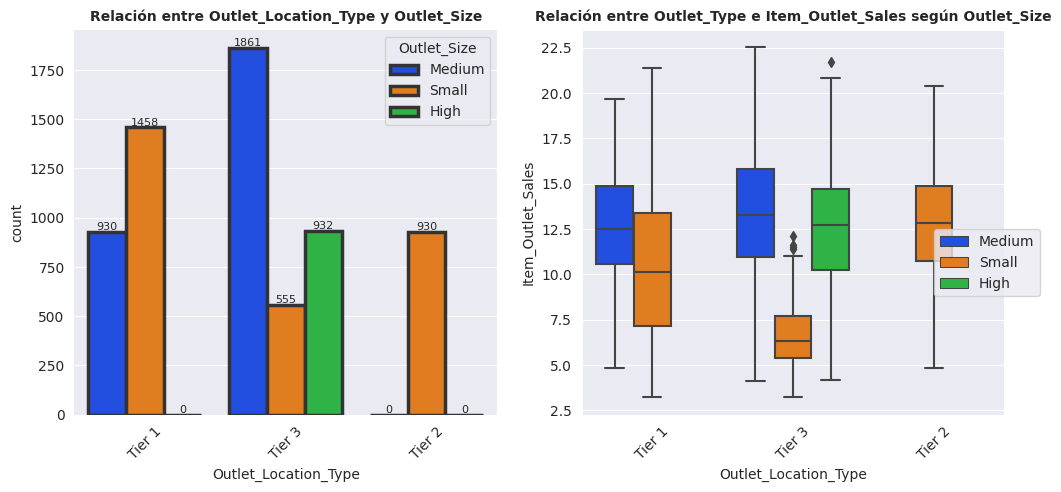

In [287]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.countplot(data=df_train,ax=ax[0],x='Outlet_Location_Type',hue='Outlet_Size',linewidth=2.5, edgecolor=".2",palette='bright')
ax[0].set_title('Relación entre Outlet_Location_Type y Outlet_Size',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].tick_params(axis='x', rotation=45)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);

sns.boxplot(data=df_train,ax=ax[1],x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',palette='bright')
ax[1].set_title('Relación entre Outlet_Type e Item_Outlet_Sales según Outlet_Size',size=10,fontweight='bold')
sns.set_style('darkgrid')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(loc='upper right', bbox_to_anchor=(1.1, 0.5))

plt.show()



Mismo proceso. Tier 2 son todos Small Shops. Entonces buscamos la condicion del Dataframe que Outlet_location_type sea igual a Tier 2 y Outlet Size tenga null values y los convertimos a Small.

También, cabe aclarar, que estaría bueno saber que significa Tier 1, Tier 2 y Tier 3.

In [288]:
#hay 1855 valores nulos
df_train[(df_train['Outlet_Location_Type']=='Tier 2') & (df_train['Outlet_Size'].isna())] 
#isna, isnull es lo mismo

Item_Identifier  Item_Weight  Item_Visibility              Item_Type   
8              FDH17        16.20         0.016687           Frozen Foods  \
9              FDU28        19.20         0.094450           Frozen Foods   
25             NCD06        13.00         0.099887              Household   
33             FDO23        17.85         0.065960                 Breads   
46             NCP05        19.60         0.065960     Health and Hygiene   
...              ...          ...              ...                    ...   
8499           FDW21         5.34         0.005998            Snack Foods   
8500           NCH43         8.42         0.070712              Household   
8506           FDW31        11.35         0.043246  Fruits and Vegetables   
8512           FDA01        15.00         0.054489                 Canned   
8517           FDS36         8.38         0.046982           Baking Goods   

      Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size   
8      96.9726            OUT045                      2002         NaN  \
9     187.8214            OUT017                      2007         NaN   
25     45.9060            OUT017                      2007         NaN   
33     93.1436            OUT045                      2002         NaN   
46    153.3024            OUT045                      2002         NaN   
...        ...               ...                       ...         ...   
8499  100.4358            OUT017                      2007         NaN   
8500  216.4192            OUT045                      2002         NaN   
8506  199.4742            OUT045                      2002         NaN   
8512   57.5904            OUT045                      2002         NaN   
8517  108.1570            OUT045                      2002         NaN   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales   
8                  Tier 2  Supermarket Type1          10.249073  \
9                  Tier 2  Supermarket Type1          16.763193   
25                 Tier 2  Supermarket Type1           9.431298   
33                 Tier 2  Supermarket Type1          12.955474   
46                 Tier 2  Supermarket Type1          13.442072   
...                   ...                ...                ...   
8499               Tier 2  Supermarket Type1          11.467551   
8500               Tier 2  Supermarket Type1          14.454584   
8506               Tier 2  Supermarket Type1          13.729439   
8512               Tier 2  Supermarket Type1           7.767933   
8517               Tier 2  Supermarket Type1           8.189661   

     Letter_Item_Identifier  Number_Item_Identifier  
8                       FDH                      17  
9                       FDU                      28  
25                      NCD                       6  
33                      FDO                      23  
46                      NCP                       5  
...                     ...                     ...  
8499                    FDW                      21  
8500                    NCH                      43  
8506                    FDW                      31  
8512                    FDA                       1  
8517                    FDS                      36  

[1855 rows x 13 columns]

In [289]:
#hay 1236 valores nulos
df_test[(df_test['Outlet_Location_Type']=='Tier 2') & (df_test['Outlet_Size'].isna())] 

Item_Identifier  Item_Weight  Item_Visibility              Item_Type   
1              FDW14        8.300         0.038428                  Dairy  \
3              FDQ58        7.315         0.015388            Snack Foods   
8              FDN33        6.305         0.123365            Snack Foods   
9              FDA36        5.985         0.005698           Baking Goods   
10             FDT44       16.600         0.103569  Fruits and Vegetables   
...              ...          ...              ...                    ...   
5662           FDK22        9.800         0.026234            Snack Foods   
5670           FDO03       10.395         0.037092                   Meat   
5678           NCO17       10.000         0.073529     Health and Hygiene   
5679           FDJ26       15.300         0.065960                 Canned   
5680           FDU37        9.500         0.104720                 Canned   

      Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size   
1      87.3198            OUT017                      2007         NaN  \
3     155.0340            OUT017                      2007         NaN   
8      95.7436            OUT045                      2002         NaN   
9     186.8924            OUT017                      2007         NaN   
10    118.3466            OUT017                      2007         NaN   
...        ...               ...                       ...         ...   
5662  214.3850            OUT017                      2007         NaN   
5670  229.4352            OUT017                      2007         NaN   
5678  118.7440            OUT045                      2002         NaN   
5679  214.6218            OUT017                      2007         NaN   
5680   79.7960            OUT045                      2002         NaN   

     Outlet_Location_Type        Outlet_Type Letter_Item_Identifier   
1                  Tier 2  Supermarket Type1                    FDW  \
3                  Tier 2  Supermarket Type1                    FDQ   
8                  Tier 2  Supermarket Type1                    FDN   
9                  Tier 2  Supermarket Type1                    FDA   
10                 Tier 2  Supermarket Type1                    FDT   
...                   ...                ...                    ...   
5662               Tier 2  Supermarket Type1                    FDK   
5670               Tier 2  Supermarket Type1                    FDO   
5678               Tier 2  Supermarket Type1                    NCO   
5679               Tier 2  Supermarket Type1                    FDJ   
5680               Tier 2  Supermarket Type1                    FDU   

      Number_Item_Identifier  
1                         14  
3                         58  
8                         33  
9                         36  
10                        44  
...                      ...  
5662                      22  
5670                       3  
5678                      17  
5679                      26  
5680                      37  

[1236 rows x 12 columns]

In [290]:
df_train[(df_train['Outlet_Location_Type']=='Tier 2') & (df_train['Outlet_Size'].isna())]['Item_Outlet_Sales'].describe() 

count    1855.000000
mean       12.487676
std         2.910638
min         4.639577
25%        10.427643
50%        12.486490
75%        14.454584
max        21.300849
Name: Item_Outlet_Sales, dtype: float64

In [291]:
df_train[df_train['Outlet_Location_Type']=='Tier 2']['Item_Outlet_Sales'].describe()

count    2785.000000
mean       12.602836
std         2.916415
min         4.639577
25%        10.542707
50%        12.607726
75%        14.597625
max        21.300849
Name: Item_Outlet_Sales, dtype: float64

Hacemos lo mismo. Convertimos los nulos a Small.

In [292]:
#Chequea la condición Outlet_Location_Type =='Tier 2' y Outlet_Size tenga null values, para retornar la columna Outlet_Size y a eso le pongo Small
#Transformamos esos 1855 null values del primer dataset y 1236 del test set.

df_train.loc[(df_train['Outlet_Location_Type'] == 'Tier 2') & (df_train['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

df_test.loc[(df_test['Outlet_Location_Type'] == 'Tier 2') & (df_test['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'


In [293]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2791
High       932
Name: count, dtype: int64

In [294]:
#No hay más null values.
df_train['Outlet_Size'].isnull().sum()

0

In [295]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1461
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Letter_Item_Identifier          0
Number_Item_Identifier          0
dtype: int64

In [296]:
df_test.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Letter_Item_Identifier         0
Number_Item_Identifier         0
dtype: int64

De esa manera queda resuelto el problema de los null values de Outlet_Size. Me pareció esto más apropiado que imputarle un valor o poner en promedio los mismos valores. También me pareció que en proporción eran pocos los null values para borrar la variable. De todas formas, sabemos que esto es una posibilidad de colinealidad entre variables independientes.

<h5>Item_Weight</h5>

Problema: No sé si está en kilogramos, gramos,etc. ¿Qué unidad maneja? ¿Hay algún motivo por el cual son null values? Es decir, ¿son productos que utilicen ese tipo de medida? Por ejemplo, hay un valor de Item_Type que se llama Health and Hygiene. ¿Un cepillo de dientes se compra por peso o por unidad? ¿Soft_drinks y Hard Drinks está en kilos o litros? ¿Están en medidas equivalentes?
¿Se venden productos más pesados en tiendas más grandes? ¿Es decir, que quizás tenga que movilizarse para ser comprado?
O simplemente hay error de carga.
¿Hago una columna nueva que se llame Item con peso e Item sin peso?

In [297]:
df_train['Item_Weight'].describe() #distribuciones similares

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [298]:
df_test['Item_Weight'].describe() #distribuciones similares

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [299]:
#Item_Fat_Content e Item_Visibility tal vez nos dice algo, pero vamos a chequear todos las variables.

top_20_rows = df_train.nlargest(20, 'Item_Weight') 
top_20_rows

Item_Identifier  Item_Weight  Item_Visibility              Item_Type   
43             FDC02        21.35         0.069103                 Canned  \
483            FDC02        21.35         0.115195                 Canned   
2368           FDC02        21.35         0.068809                 Canned   
2802           FDC02        21.35         0.068765                 Canned   
4257           FDR07        21.35         0.130127  Fruits and Vegetables   
4468           FDC02        21.35         0.068822                 Canned   
6388           FDR07        21.35         0.078061  Fruits and Vegetables   
148            FDA45        21.25         0.155350            Snack Foods   
934            FDQ21        21.25         0.019502            Snack Foods   
2232           FDT03        21.25         0.009997                   Meat   
3478           FDQ21        21.25         0.019423            Snack Foods   
3632           FDT03        21.25         0.010039                   Meat   
4054           FDT03        21.25         0.016736                   Meat   
4764           FDT03        21.25         0.010055                   Meat   
5111           NCO42        21.25         0.024651              Household   
5392           FDT03        21.25         0.010019                   Meat   
5456           NCO42        21.25         0.024706              Household   
5716           NCX17        21.25         0.114246     Health and Hygiene   
5781           FDA45        21.25         0.155250            Snack Foods   
5958           FDQ21        21.25         0.019407            Snack Foods   

      Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size   
43    259.9278            OUT018                      2009      Medium  \
483   258.3278            OUT010                      1998       Small   
2368  258.5278            OUT035                      2004       Small   
2802  260.4278            OUT013                      1987        High   
4257   96.2094            OUT010                      1998       Small   
4468  258.3278            OUT046                      1997       Small   
6388   96.0094            OUT018                      2009      Medium   
148   178.2370            OUT035                      2004       Small   
934   120.8756            OUT018                      2009      Medium   
2232  185.5608            OUT035                      2004       Small   
3478  120.8756            OUT046                      1997       Small   
3632  181.7608            OUT018                      2009      Medium   
4054  185.2608            OUT010                      1998       Small   
4764  183.1608            OUT017                      2007       Small   
5111  146.0102            OUT035                      2004       Small   
5392  184.6608            OUT045                      2002       Small   
5456  145.1102            OUT045                      2002       Small   
5716  231.2300            OUT017                      2007       Small   
5781  175.7370            OUT013                      1987        High   
5958  119.3756            OUT013                      1987        High   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales   
43                 Tier 3  Supermarket Type2          18.916087  \
483                Tier 3      Grocery Store           8.044830   
2368               Tier 2  Supermarket Type1          17.332060   
2802               Tier 3  Supermarket Type1          15.389205   
4257               Tier 3      Grocery Store           5.753118   
4468               Tier 1  Supermarket Type1          19.155556   
6388               Tier 3  Supermarket Type2           7.248474   
148                Tier 2  Supermarket Type1           8.089164   
934                Tier 3  Supermarket Type2          14.659849   
2232               Tier 2  Supermarket Type1          14.618425   
3478               Tier 1  Supermarket Type1          14.659849   
3632               Tier 3  S

In [300]:
less_20_rows = df_train.nsmallest(20, 'Item_Weight')

less_20_rows

Item_Identifier  Item_Weight  Item_Visibility     Item_Type  Item_MRP   
3489           FDP40        4.555         0.034351  Frozen Foods  112.7544  \
4400           FDP40        4.555         0.034411  Frozen Foods  111.3544   
4430           FDP40        4.555         0.034357  Frozen Foods  112.6544   
7806           FDP40        4.555         0.034329  Frozen Foods  110.1544   
1082           DRE12        4.590         0.070891   Soft Drinks  111.6860   
1515           DRE12        4.590         0.070781   Soft Drinks  114.5860   
3077           DRE12        4.590         0.070767   Soft Drinks  111.9860   
6431           DRE12        4.590         0.070722   Soft Drinks  113.2860   
7982           DRE12        4.590         0.065960   Soft Drinks  111.1860   
966            DRF23        4.610         0.205295   Hard Drinks  172.8396   
1412           DRF23        4.610         0.123346   Hard Drinks  172.5396   
2254           DRF23        4.610         0.122843   Hard Drinks  172.4396   
3051           DRF23        4.610         0.122901   Hard Drinks  174.4396   
5492           DRF23        4.610         0.065960   Hard Drinks  173.8396   
6334           DRF23        4.610         0.122629   Hard Drinks  175.4396   
7557           DRF23        4.610         0.123152   Hard Drinks  175.2396   
2198           FDX49        4.615         0.101813        Canned  232.2300   
2373           FDX49        4.615         0.102408        Canned  234.3300   
4021           FDX49        4.615         0.102038        Canned  231.9300   
4606           FDX49        4.615         0.101747        Canned  231.3300   

     Outlet_Identifier Outlet_Establishment_Year Outlet_Size   
3489            OUT035                      2004       Small  \
4400            OUT049                      1999      Medium   
4430            OUT046                      1997       Small   
7806            OUT013                      1987        High   
1082            OUT049                      1999      Medium   
1515            OUT046                      1997       Small   
3077            OUT035                      2004       Small   
6431            OUT013                      1987        High   
7982            OUT045                      2002       Small   
966             OUT010                      1998       Small   
1412            OUT017                      2007       Small   
2254            OUT049                      1999      Medium   
3051            OUT045                      2002       Small   
5492            OUT046                      1997       Small   
6334            OUT035                      2004       Small   
7557            OUT018                      2009      Medium   
2198            OUT035                      2004       Small   
2373            OUT017                      2007       Small   
4021            OUT045                      2002       Small   
4606            OUT013                      1987        High   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales   
3489               Tier 2  Supermarket Type1          12.141090  \
4400               Tier 1  Supermarket Type1          11.030912   
4430               Tier 1  Supermarket Type1          13.898079   
7806               Tier 3  Supermarket Type1          10.715569   
1082               Tier 1  Supermarket Type1          11.658435   
1515               Tier 1  Supermarket Type1          10.757924   
3077               Tier 2  Supermarket Type1           9.253306   
6431               Tier 3  Supermarket Type1          11.373969   
7982               Tier 2  Supermarket Type1          10.757924   
966                Tier 3      Grocery Store           5.587468   
1412               Tier 2  Supermarket Type1          15.415400   
2254               Tier 1  Supermarket Type1          11.622401   
3051               Tier 2  Supermarket Type1          13.779880   
5492               Tier 1  Supermarket Type1          10.688441   
6334            

Usamos Plotly porque consideramos mejor la interfaz gráfica para poder ver los gráficos.

In [301]:
#Si bien es cierto que la variable modifica, es casi imperceptible.
px.scatter(df_train,x='Item_Weight',y='Item_Outlet_Sales',color='Item_Type')

In [302]:
#Al parecer tiene alguna correlación con Item_MRP
px.scatter(df_train,x='Item_Weight',y='Item_Outlet_Sales',color='Item_MRP')

In [303]:
px.scatter(df_train,x='Item_Weight',y='Item_Outlet_Sales',color='Letter_Item_Identifier')

In [304]:
#Quizás lo mejor sería completar con la mediana de todos los elementos
px.box(df_train,x='Item_Type',y='Item_Weight')

<h5>Relación entre Item_Type e Item Weight</h5>


![Relacion entre Item_Type e Item_Weight](newplot2.png)

Voy a imputar la mediana de cada valor que toma Item_Type.

In [305]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [306]:
for i in df_train['Item_Type'].unique():

# Calcula la mediana de 'Item_Weight' para el tipo de ítem
    median = df_train[df_train['Item_Type'] == i]['Item_Weight'].median()

# Completa los valores nulos en 'Item_Weight'con la mediana
    df_train.loc[(df_train['Item_Type'] == i) & (df_train['Item_Weight'].isna()), 'Item_Weight'] = median

In [307]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Letter_Item_Identifier       0
Number_Item_Identifier       0
dtype: int64

De esta manera, queda terminado la asignación de valores a los null values. Vemos el resultado:

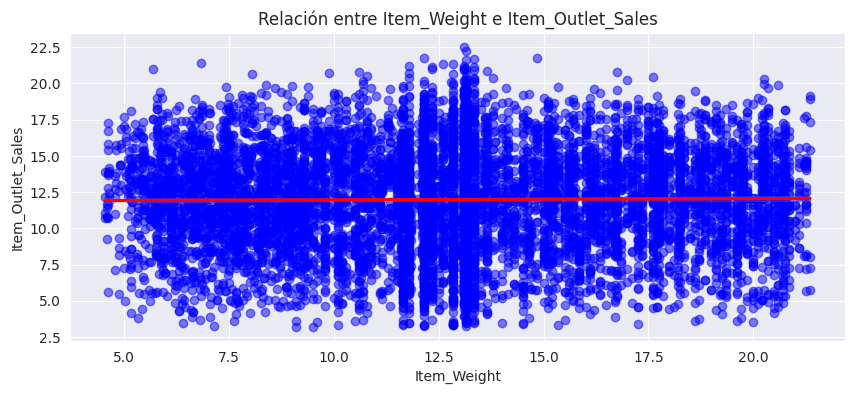

In [308]:
plt.figure(figsize=(10, 4))
plt.title('Relación entre Item_Weight e Item_Outlet_Sales')
sns.regplot(data=df_train,x='Item_Weight',y='Item_Outlet_Sales',scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})

plt.show()

In [309]:
#No hay linealidad del feature, la elimino
df_train.drop(columns=['Item_Weight'],inplace=True)

df_test.drop(columns=['Item_Weight'],inplace=True)

DATA PREP

Tengo que escalar los features numéricos para que estén a escala. Vimos previamente que la nueva columna creada Number_Item_Identifier no nos aporta ningún dato. 

In [310]:
print(f'Las columnas del df_train son: \n {df_train.select_dtypes(include=np.number).columns}')
print(f'Cantidad de variables numéricas: {len(df_train.select_dtypes(include=np.number).columns)}')
print('################'*5)
print(f'Las columnas del df_test son: \n {df_test.select_dtypes(include=np.number).columns}')
print(f'Cantidad de variables numéricas: {len(df_test.select_dtypes(include=np.number).columns)}')

Las columnas del df_train son: 
 Index(['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Number_Item_Identifier'],
      dtype='object')
Cantidad de variables numéricas: 4
################################################################################
Las columnas del df_test son: 
 Index(['Item_Visibility', 'Item_MRP', 'Number_Item_Identifier'], dtype='object')
Cantidad de variables numéricas: 3


In [311]:
#Drop la columna Number_Item_Identifier de ambos Datasets, no hay linealidad

df_train.drop(columns='Number_Item_Identifier',axis=1,inplace=True)
df_test.drop(columns='Number_Item_Identifier',axis=1,inplace=True)

In [312]:

 #Probe con standard scaler y con MinMax
col=[ 'Item_Visibility', 'Item_MRP']
scaler = StandardScaler()
df_train[col]=scaler.fit_transform(df_train[col])

df_test[col]=scaler.fit_transform(df_test[col])


In [313]:
#hago una prueba de modelo de regresión lineal simple con statsmodels para ver estadísticos

#Kitchen sink model with num_values
y_ks = df_train['Item_Outlet_Sales']
X_ks = df_train[['Item_Visibility','Item_MRP']]
X_ks= sm.add_constant(X_ks)

ks = sm.OLS(y_ks,X_ks)
ks_res=ks.fit()
ks_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     2150.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:57:40   Log-Likelihood:                -21212.
No. Observations:                8521   AIC:                         4.243e+04
Df Residuals:                    8518   BIC:                         4.245e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.9892      0.032    379.381      0.000      11.927      12.051
Item_Visibility    -0.6363      0.032    -20.135      0.000      -0.698      -0.574
Item_MRP            1.9693      0.032     62.315      0.000       1.907       2.031
==============================================================================
Omnibus:                      352.765   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.352
Skew:                          -0.527   Prob(JB):                     5.20e-87
Kurtosis:                       3.081   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Que item_Visibility tenga un coeficiente negativo nos da de que pensar, el P value es 0, entonces es estadisticamente significativa, tomando 0,05 como limite.

Categorical encoding

Procedemos a hacer el Categorical encoding.

In [314]:
print(f'Las columnas categoricas del df_train son: \n {df_train.select_dtypes(include=object).columns}')
print(f'Cantidad de variables categoricas: {len(df_train.select_dtypes(include=object).columns)}')
print('################'*5)
print(f'Las columnas categoricas del df_test son: \n {df_test.select_dtypes(include=object).columns}')
print(f'Cantidad de variables categoricas: {len(df_test.select_dtypes(include=object).columns)}')

Las columnas categoricas del df_train son: 
 Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Letter_Item_Identifier'],
      dtype='object')
Cantidad de variables categoricas: 8
################################################################################
Las columnas categoricas del df_test son: 
 Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Letter_Item_Identifier'],
      dtype='object')
Cantidad de variables categoricas: 8


In [315]:
#Hacemos drop de la columna Item_Identifier
df_train.drop(columns='Item_Identifier',axis=1,inplace=True)
df_test.drop(columns='Item_Identifier',axis=1,inplace=True)

In [316]:
#Outlet_Size es una variable ordinal

ordinal_encoder = OrdinalEncoder() #denota jerarquía

df_train['Outlet_Size'] = ordinal_encoder.fit_transform(df_train[['Outlet_Size']])

df_test['Outlet_Size'] = ordinal_encoder.fit_transform(df_test[['Outlet_Size']])



In [317]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
2.0    4798
1.0    2791
0.0     932
Name: count, dtype: int64

In [318]:
ohe = OneHotEncoder()



df_ohe = pd.DataFrame(ohe.fit_transform(df_train[['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Letter_Item_Identifier']]).toarray(),
                      columns=ohe.get_feature_names_out(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Letter_Item_Identifier']))


df_ohe_test= pd.DataFrame(ohe.fit_transform(df_test[['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Letter_Item_Identifier']]).toarray(),
                      columns=ohe.get_feature_names_out(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Letter_Item_Identifier']))




In [319]:
#Esta parte la hago para saber si tiene las mismas columnas

print(f'la dimensión del ohe es de: {df_ohe.shape}')
print(f'la dimensión del ohe del test es de: {df_ohe_test.shape}')

la dimensión del ohe es de: (8521, 113)
la dimensión del ohe del test es de: (5681, 113)


In [320]:
#concateno
num_cols= [ 'Item_Visibility', 'Item_MRP']


df_definite = pd.concat([df_train[num_cols],df_train['Outlet_Size'],df_ohe,df_train['Item_Outlet_Sales']],axis=1)

df_definite_test = pd.concat([df_test[num_cols],df_test['Outlet_Size'],df_ohe_test],axis=1)

print(f'df_definite: {df_definite.shape}')
print(f'df_definite test: {df_definite_test.shape}')

df_definite: (8521, 117)
df_definite test: (5681, 116)


Correlation Matrix

In [321]:
#Con la siguiente función vamos a saber el nivel de correlación de los features
#Y vamos a eliminar el primero de estos

def correlation(dataset, threshold):
    col_corr = set()  # Set todos los nombres de las columnas correlacionadas
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # valores absolutos de la correlacion
                colname = corr_matrix.columns[i] #obtengo el valor de la columna
                col_corr.add(colname)
    return col_corr


In [322]:
corr_features=correlation(df_definite,0.70) #si las variables están correlacionadas >0.6 las eliminamos
len(set(corr_features))

12

In [323]:
corr_features #estas son las variables a eliminar



{'Outlet_Establishment_Year_1985',
 'Outlet_Establishment_Year_1987',
 'Outlet_Establishment_Year_1997',
 'Outlet_Establishment_Year_1998',
 'Outlet_Establishment_Year_1999',
 'Outlet_Establishment_Year_2002',
 'Outlet_Establishment_Year_2004',
 'Outlet_Establishment_Year_2007',
 'Outlet_Establishment_Year_2009',
 'Outlet_Identifier_OUT013',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3'}

In [324]:
df_definite.drop(corr_features,axis=1,inplace=True) #hago el drop de las variables
df_definite_test.drop(corr_features,axis=1,inplace=True)

In [325]:
#acá veo como están correlacionados con el target del dataset

correlation=df_definite.corr()['Item_Outlet_Sales']

sorted_correlation = correlation.abs().sort_values(ascending=False)

print(sorted_correlation)

Item_Outlet_Sales             1.000000
Outlet_Type_Grocery Store     0.578437
Item_MRP                      0.551252
Outlet_Identifier_OUT010      0.401572
Outlet_Identifier_OUT019      0.388131
                                ...   
Letter_Item_Identifier_NCV    0.001035
Letter_Item_Identifier_FDT    0.000973
Letter_Item_Identifier_FDU    0.000657
Letter_Item_Identifier_DRA    0.000393
Item_Type_Dairy               0.000207
Name: Item_Outlet_Sales, Length: 105, dtype: float64


In [326]:
#hago una segunda prueba

#hago una prueba de modelo de regresión lineal simple con statsmodels para ver estadísticos


#Kitchen sink model with num_values
y_ks2 = df_definite['Item_Outlet_Sales']
X_ks2 = df_definite[['Item_MRP','Item_Visibility','Outlet_Type_Grocery Store']]
X_ks2= sm.add_constant(X_ks2)

ks2 = sm.OLS(y_ks2,X_ks2)
ks2_res=ks2.fit()
ks2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     4958.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:57:42   Log-Likelihood:                -18649.
No. Observations:                8521   AIC:                         3.731e+04
Df Residuals:                    8517   BIC:                         3.733e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        12.7734      0.025    506.953      0.000      12.724      12.823
Item_MRP                      1.9638      0.023     83.938      0.000       1.918       2.010
Item_Visibility              -0.0210      0.025     -0.858      0.391      -0.069       0.027
Outlet_Type_Grocery Store    -6.1703      0.074    -83.819      0.000      -6.315      -6.026
==============================================================================
Omnibus:                      121.400   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.488
Skew:                          -0.243   Prob(JB):                     5.14e-31
Kurtosis:                       3.396   Cond. No.                         3.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p value de Item_Visibility se me va 0.3, la variable pasaría a ser estadisticamente poco significativa.

In [327]:
#Kitchen sink model with num_values
y_ks3 = df_definite['Item_Outlet_Sales']
X_ks3 = df_definite[['Item_MRP','Outlet_Type_Grocery Store']]
X_ks3= sm.add_constant(X_ks3)

ks3 = sm.OLS(y_ks3,X_ks3)
ks3_res=ks3.fit()
ks3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     7436.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:57:42   Log-Likelihood:                -18650.
No. Observations:                8521   AIC:                         3.731e+04
Df Residuals:                    8518   BIC:                         3.733e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        12.7758      0.025    510.219      0.000      12.727      12.825
Item_MRP                      1.9638      0.023     83.943      0.000       1.918       2.010
Outlet_Type_Grocery Store    -6.1892      0.070    -88.118      0.000      -6.327      -6.051
==============================================================================
Omnibus:                      121.226   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.233
Skew:                          -0.243   Prob(JB):                     5.83e-31
Kurtosis:                       3.395   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Todavía no me animo a borrar Item Visibility

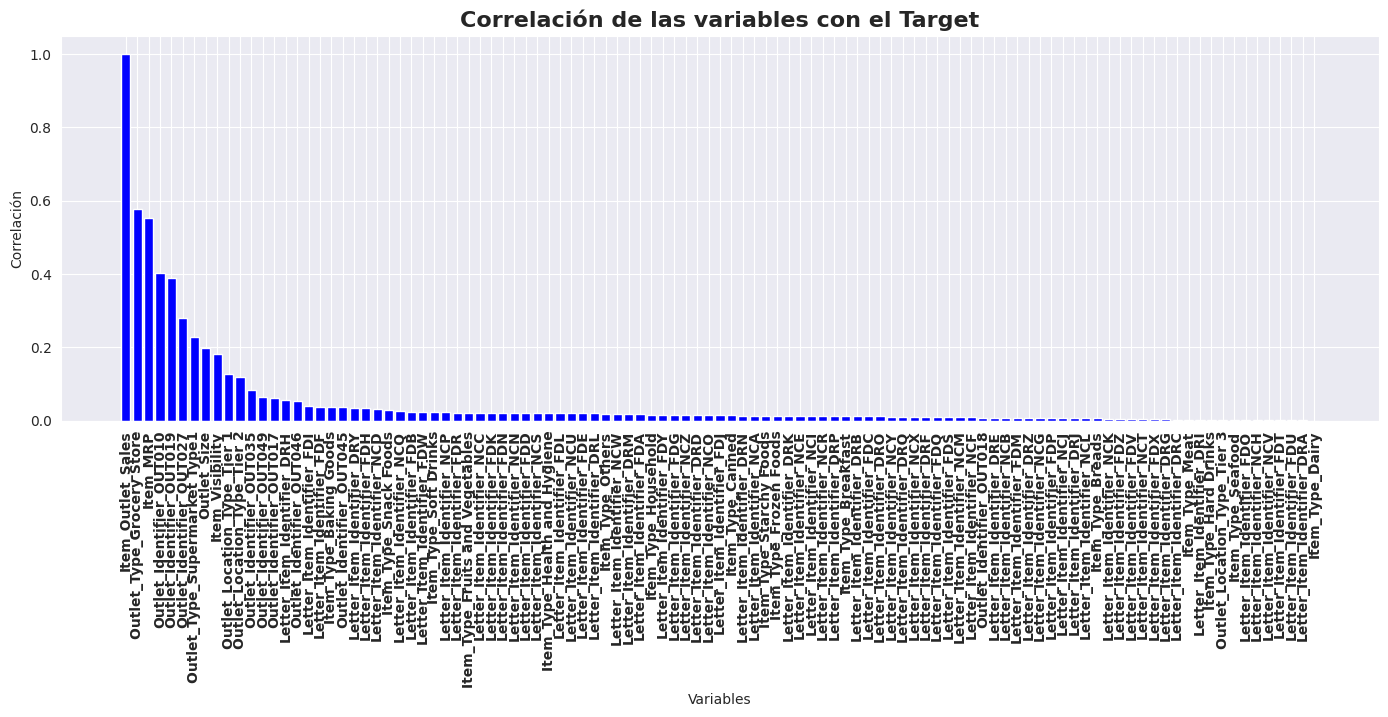

In [328]:
plt.figure(figsize=(17, 5))
plt.title('Correlación de las variables con el Target',size=16,fontweight='bold')
plt.bar(sorted_correlation.index, sorted_correlation,color='blue')
plt.xticks(rotation=90,size=10,fontweight='bold')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

In [329]:
# Obtener las 70 variables con menor correlación, esto implica que no hay linealidad
variables_a_eliminar = sorted_correlation.tail(70).index

# Eliminar las variables del DataFrame
df_definite = df_definite.drop(variables_a_eliminar, axis=1)

df_definite_test = df_definite_test.drop(variables_a_eliminar, axis=1)

In [330]:
print(f'largo columnas:{len(df_definite.columns)} \n columnas \n {df_definite.columns}')

largo columnas:35 
 columnas 
 Index(['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Item_Type_Baking Goods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Letter_Item_Identifier_DRH',
       'Letter_Item_Identifier_DRY', 'Letter_Item_Identifier_FDB',
       'Letter_Item_Identifier_FDF', 'Letter_Item_Identifier_FDH',
       'Letter_Item_Identifier_FDI', 'Letter_Item_Identifier_FDK',
       'Letter_Item_Identifier_FDN', 'Letter_Item_Identifier_FDR',
       'Letter_Item_Identifier_FDW', 'Letter_Item_Identifier_NCC',
       'Letter_Item_Identifier_NCD',

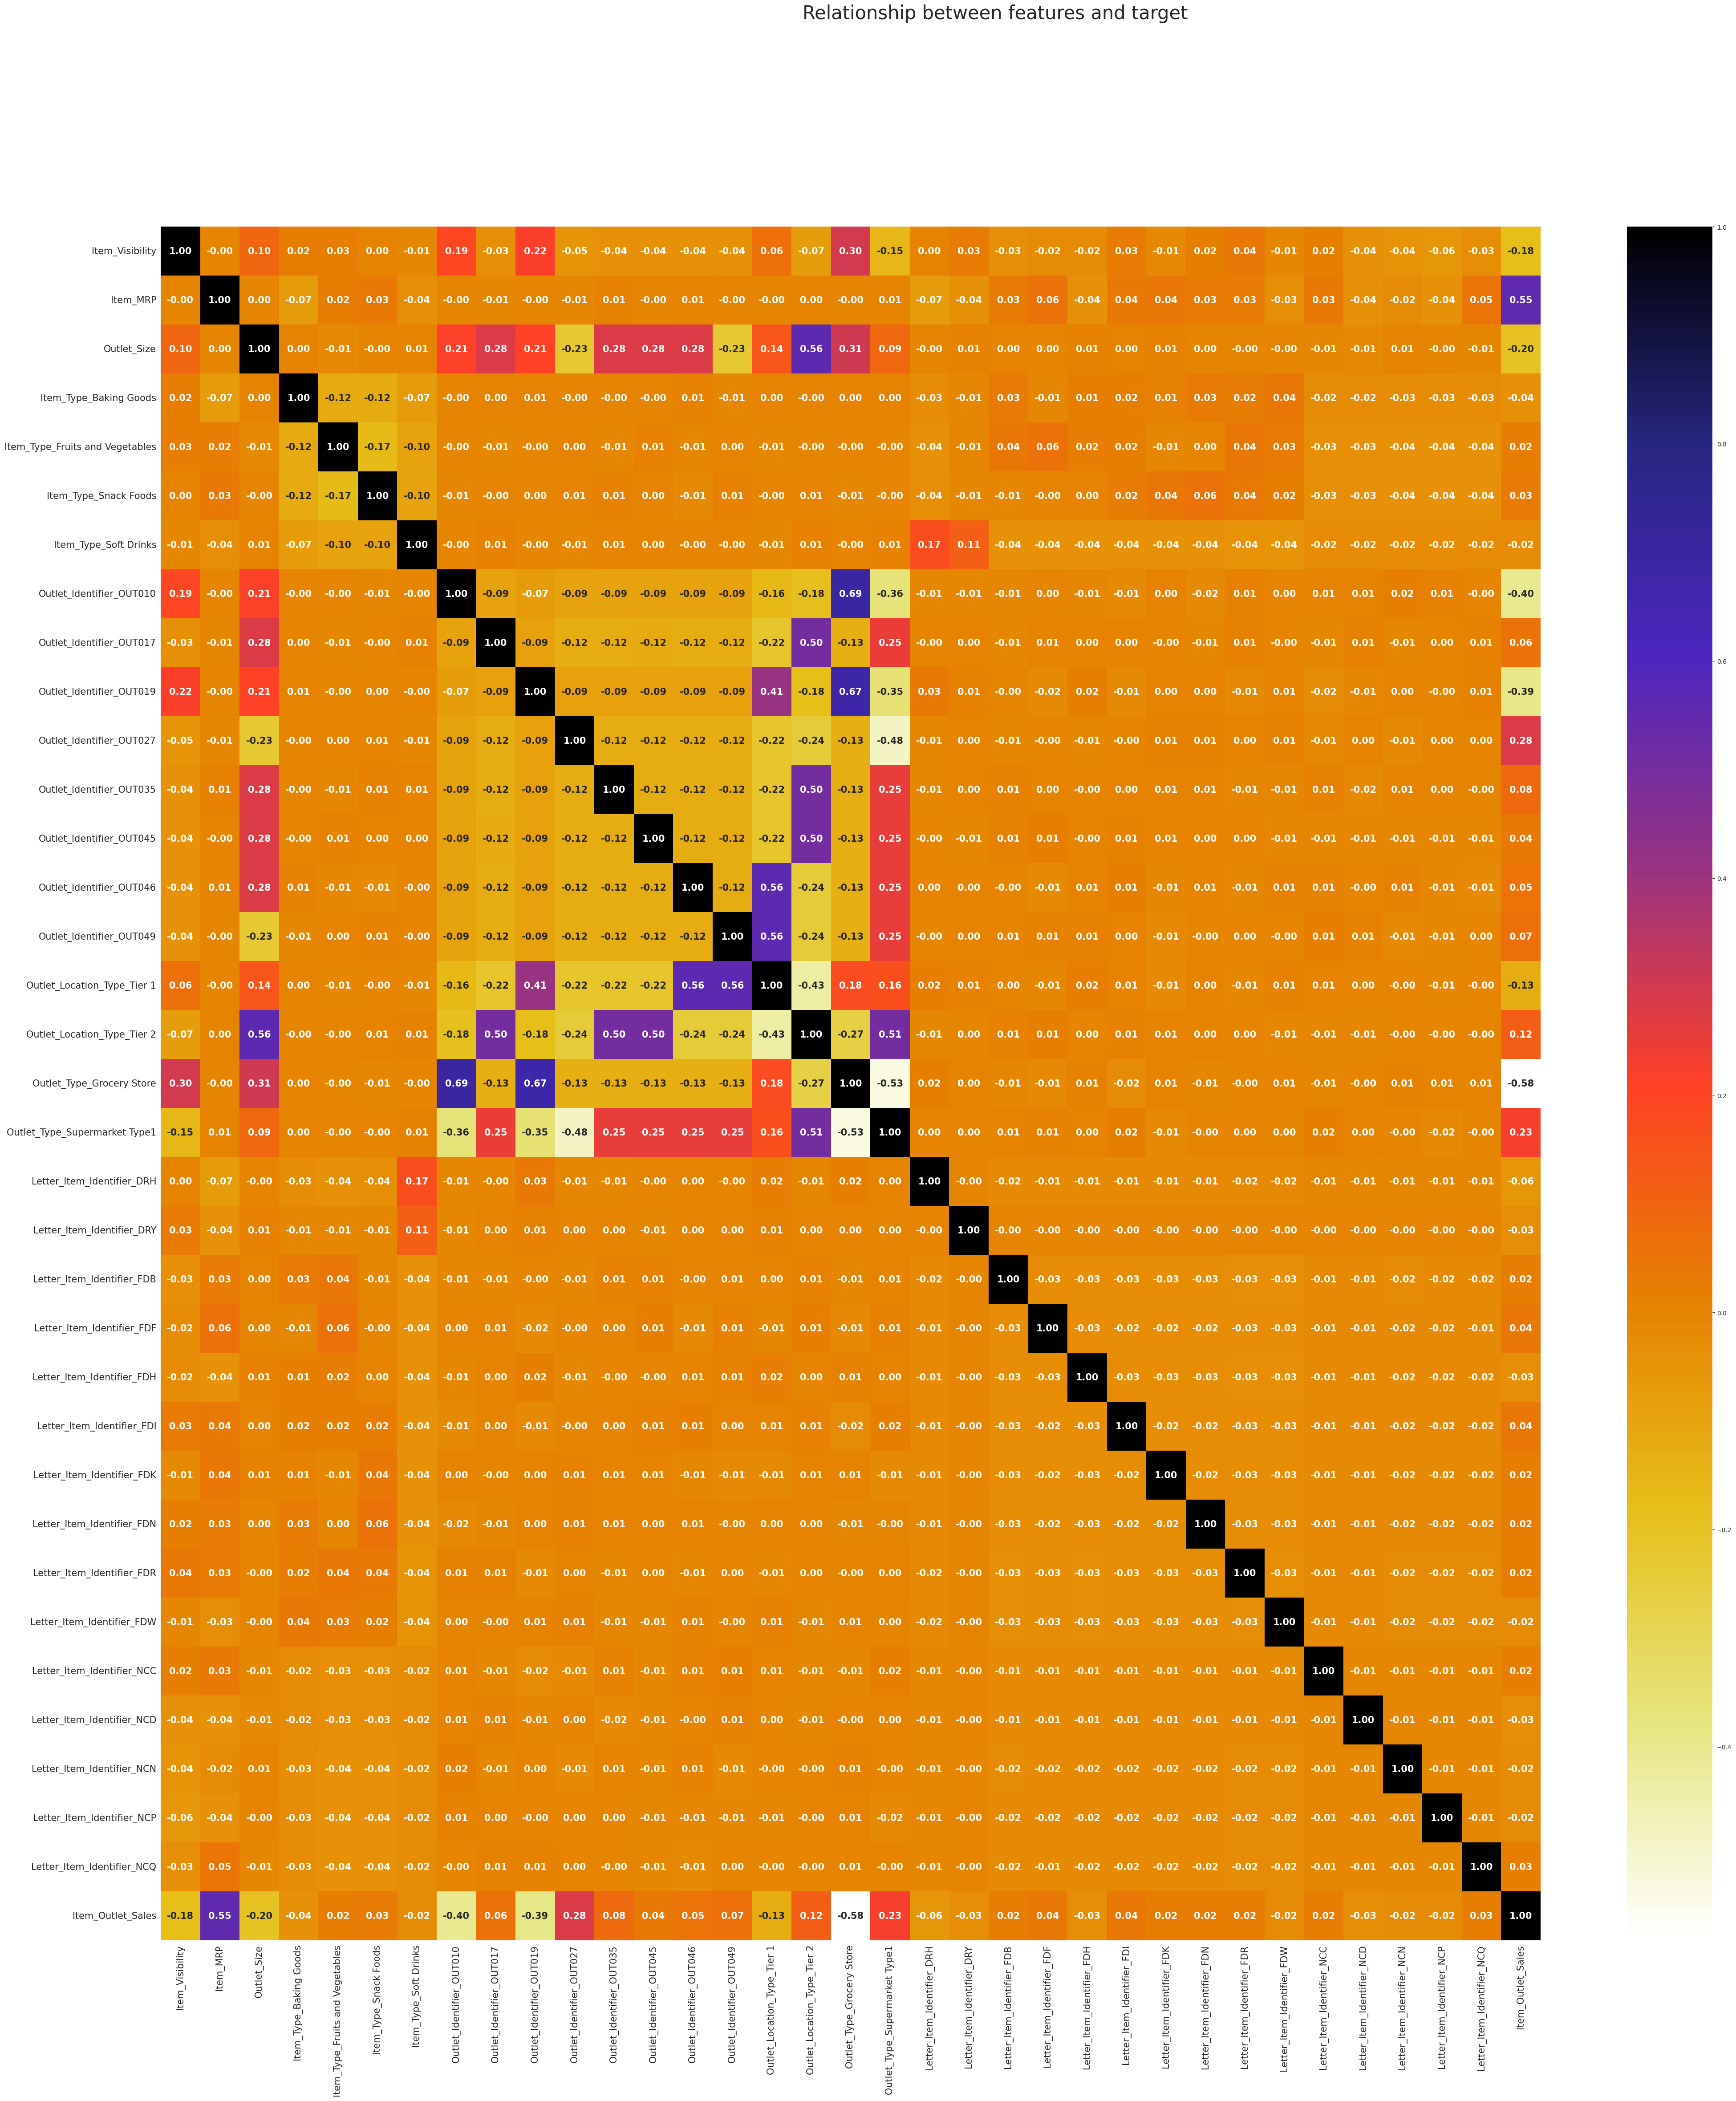

In [331]:
#Looking at the Multicolinearity and the relationship between Features and target
fig, ax= plt.subplots(figsize=(50,50))
sns.heatmap(df_definite.corr(),annot=True,annot_kws={'size': 15,'weight': 'bold'},cmap='CMRmap_r',fmt=".2f")
plt.suptitle("Relationship between features and target",size=30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()



In [332]:
#Uso Select K best? f-statistics random forest?

df_definite.drop(columns=['Outlet_Identifier_OUT010','Outlet_Identifier_OUT019'],inplace=True)


df_definite_test.drop(columns=['Outlet_Identifier_OUT010','Outlet_Identifier_OUT019'],inplace=True)

In [333]:
y= df_definite['Item_Outlet_Sales']

X= df_definite.drop(columns='Item_Outlet_Sales',axis=1)


In [334]:
select = SelectKBest(score_func=f_regression, k=8)
X_best = select.fit_transform(X,y)
print("After selecting best 8 features:", X_best.shape)

After selecting best 8 features: (8521, 8)


In [335]:
feature_indices = select.get_support(indices=True)
selected_features = X.columns[feature_indices]
selected_features

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Identifier_OUT027', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1'],
      dtype='object')

In [336]:
#Kitchen sink model with num_values
y_ks3 = y
X_ks3 = X[[ 'Item_MRP',
       'Outlet_Identifier_OUT027',
        'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1']]
X_ks3= sm.add_constant(X_ks3)

ks3 = sm.OLS(y_ks3,X_ks3)
ks_res3=ks3.fit()
ks_res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     4577.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:57:52   Log-Likelihood:                -18065.
No. Observations:                8521   AIC:                         3.614e+04
Df Residuals:                    8516   BIC:                         3.617e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            11.8823      0.066    179.501      0.000      11.753      12.012
Item_MRP                          1.9706      0.022     90.201      0.000       1.928       2.013
Outlet_Identifier_OUT027          2.9960      0.093     32.045      0.000       2.813       3.179
Outlet_Type_Grocery Store        -5.2956      0.090    -58.706      0.000      -5.472      -5.119
Outlet_Type_Supermarket Type1     0.6904      0.071      9.657      0.000       0.550       0.831
==============================================================================
Omnibus:                      253.789   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.388
Skew:                          -0.394   Prob(JB):                     8.77e-64
Kurtosis:                       3.443   Cond. No.                         7.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [337]:
X= X[[ 'Item_MRP',
       'Outlet_Identifier_OUT027',
        'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1']]

df_definite_test=df_definite_test[[ 'Item_MRP',
       'Outlet_Identifier_OUT027',
        'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1']]

In [338]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [339]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1704, 4)
(1704,)
(6817, 4)
(6817,)


In [340]:
#model
LR = LinearRegression()

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_val)

#score variables
#Mean Absolute Error= la media de la diferencia entre y - ypred
LR_MAE = round(MAE(y_val, y_predict),2)
#Mean Squared Error= 1/n(y-pred)**2
LR_MSE = round(MSE(y_val, y_predict),2)
#Root Mean Squared Error
RMSE = sqrt(MSE(y_val, y_predict))
#Coeficiente de determinacion == valor 1 mejor prediccion, valor 0 peor prediccion
LR_R_2 = round(R2(y_val, y_predict),4)



print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f'Root Mean Squared error:{RMSE}\n')
print(f" R^2 Score: {LR_R_2}\n")




 Mean Absolute Error: 1.59

 Mean Squared Error: 4.08

Root Mean Squared error:2.0199739326865704

 R^2 Score: 0.6839



In [341]:
print(f'el Coeficiente de la regresión lineal múltiple es de: {LR.coef_}')
print(f'el Intercept de la regresión lineal múltiple es de {LR.intercept_} ')

el Coeficiente de la regresión lineal múltiple es de: [ 1.93529453  3.0463644  -5.13137041  0.73488564]
el Intercept de la regresión lineal múltiple es de 11.840043128310914 


In [342]:
lr_predict = LR.predict(df_definite_test) #respuesta con linear regression
lr_predict



lr_predict_transformed = np.power(lr_predict, 4)


print(lr_predict)
print(lr_predict_transformed)


[11.53653632 10.8932799   9.86290772 ... 11.8772846  14.87956329
 10.65768267]
[17713.39266454 14081.03739965  9462.80473023 ... 19900.71373427
 49018.58149887 12901.82481042]


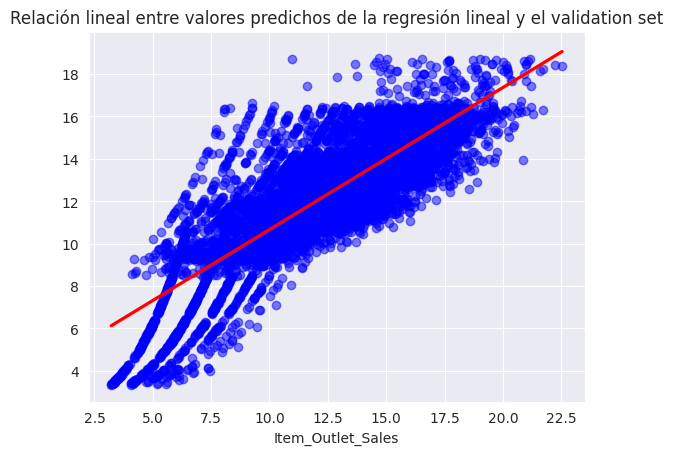

In [343]:
plt.title('Relación lineal entre valores predichos de la regresión lineal y el validation set')
sns.regplot(x=y_val,y=y_predict,scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.show()

Otros modelos:

In [344]:
estimadores={
    'Lasso':Lasso(alpha=1.0),
    'Ridge':Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Gradient_Boosting':GradientBoostingRegressor()}


for name, estimador in estimadores.items():
    estimador.fit(X_train,y_train)
    predictions = estimador.predict(X_val)

    print("="*32)
    print(name)
    
    #score variables
    #Mean Absolute Error= la media de la diferencia entre y - ypred
    MAE_coef = round(MAE(y_val, predictions),2)
    print(f'MAE:{MAE_coef}')
    #Mean Squared Error= 1/n(y-pred)**2
    MSE_coef = round(MSE(y_val, predictions),2)
    print(f'Mean squared Error: {MSE_coef}')
    #Root Mean Squared Error
    RMSE_coef = sqrt(MSE(y_val, predictions))
    print(f'Root Mean squared Error: {RMSE_coef}')
    #Coeficiente de determinacion == valor 1 mejor prediccion, valor 0 peor prediccion
    p_2 = round(R2(y_val, predictions),4)
    print(f'R 2 Score: {p_2}')


Lasso
MAE:2.53
Mean squared Error: 9.99
Root Mean squared Error: 3.161336570623079
R 2 Score: 0.2258
Ridge
MAE:1.59
Mean squared Error: 4.08
Root Mean squared Error: 2.020276854587428
R 2 Score: 0.6838
ElasticNet
MAE:2.5
Mean squared Error: 9.68
Root Mean squared Error: 3.111394835662348
R 2 Score: 0.25
Gradient_Boosting
MAE:1.55
Mean squared Error: 3.98
Root Mean squared Error: 1.994557477532997
R 2 Score: 0.6918


In [345]:
ridge = Ridge() #Ridge es el mejor modelo de estos,vamos a tunear hyperparameters con GridSearch
                #Podría hacerlo con un for loop, pero así me parece más rápido.

# Defino los valores posibles para los hiperparámetros
param_grid = {'alpha': [0.1, 1.0, 10.0,100.0,1000.0],
              'max_iter': [10000,100000,1000000]}

# búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# mejor modelo para hacer predicciones
predictions_cv = best_model.predict(X_val)

#score variables
#Mean Absolute Error= la media de la diferencia entre y - ypred
ridge_MAE = round(MAE(y_val, predictions_cv),2)
#Mean Squared Error= 1/n(y-pred)**2
ridge_MSE = round(MSE(y_val, predictions_cv),2)
#Root Mean Squared Error
ridge_RMSE = sqrt(MSE(y_val, predictions_cv))
#Coeficiente de determinacion == valor 1 mejor prediccion, valor 0 peor prediccion
ridge_R_2 = round(R2(y_val, predictions_cv),4)



print(f" Mean Absolute Error: {ridge_MAE}\n")
print(f" Mean Squared Error: {ridge_MSE}\n")
print(f'Root Mean Squared error:{ridge_RMSE}\n')
print(f" R^2 Score: {ridge_R_2}\n")


 Mean Absolute Error: 1.59

 Mean Squared Error: 4.08

Root Mean Squared error:2.020276854587428

 R^2 Score: 0.6838



In [346]:
ridge_predict = best_model.predict(df_definite_test) #respuesta con linear regression
ridge_predict



ridge_predict_transformed = np.power(ridge_predict, 4)


print(ridge_predict)
print(ridge_predict_transformed)


[11.53632251 10.89333801  9.88721621 ... 11.87692676 14.87793635
 10.65784037]
[17712.07959403 14081.33785066  9556.43971881 ... 19898.31555566
 48997.14622452 12902.5884378 ]


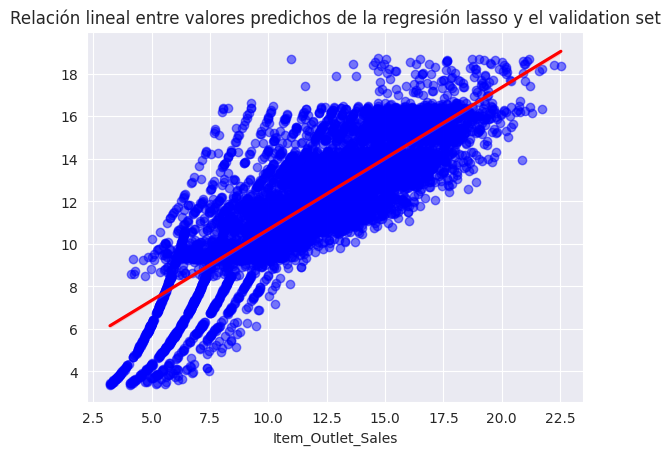

In [347]:
plt.title('Relación lineal entre valores predichos de la regresión lasso y el validation set')
sns.regplot(x=y_val,y=predictions_cv,scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.show()

In [348]:
model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 8]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

gradboost_params = grid_search.best_params_
gradboost_model = grid_search.best_estimator_


# mejor modelo para hacer predicciones
predictions_cv = gradboost_model.predict(X_val)



#score variables
#Mean Absolute Error= la media de la diferencia entre y - ypred
boost_MAE = round(MAE(y_val, predictions_cv),2)
#Mean Squared Error= 1/n(y-pred)**2
boost_MSE = round(MSE(y_val, predictions_cv),2)
#Root Mean Squared Error
boost_RMSE = sqrt(MSE(y_val, predictions_cv))
#Coeficiente de determinacion == valor 1 mejor prediccion, valor 0 peor prediccion
boost_R_2 = round(R2(y_val, predictions_cv),4)



print(f" Mean Absolute Error: {boost_MAE}\n")
print(f" Mean Squared Error: {boost_MSE}\n")
print(f'Root Mean Squared error:{boost_RMSE}\n')
print(f" R^2 Score: {boost_R_2}\n")

 Mean Absolute Error: 1.54

 Mean Squared Error: 3.91

Root Mean Squared error:1.9765029338960198

 R^2 Score: 0.6974



In [349]:
boost_predict = gradboost_model.predict(df_definite_test) #respuesta con linear regression
boost_predict



boost_predict_transformed = np.power(boost_predict, 4)


print(boost_predict)
print(boost_predict_transformed)

[11.65815819 10.89787785  7.68722641 ... 12.16082884 14.71163012
 10.81565094]
[18472.24907511 14104.82634262  3492.03582264 ... 21870.19744892
 46842.83692524 13683.92390357]


<Axes: xlabel='Item_Outlet_Sales'>

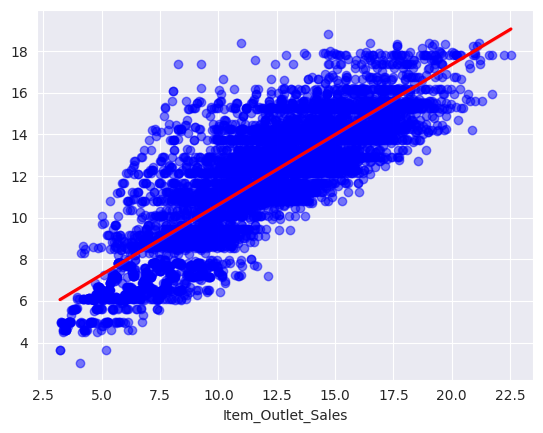

In [350]:
sns.regplot(x=y_val,y=predictions_cv,scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})

In [351]:
#predicciones con el val score comparadas

val_df = pd.DataFrame({'y_validacion':y_val,'lr_val_pred':y_predict,'lasso_val_pred':predictions_cv,'gradient_boost':predictions_cv})
val_df

y_validacion  lr_val_pred  lasso_val_pred  gradient_boost
8208     15.089140    14.540145       14.842006       14.842006
6348     14.936515    16.207475       15.442890       15.442890
574       3.360518     3.453607        4.948331        4.948331
7923     16.482080    13.747730       13.730073       13.730073
8520      9.148444    10.538855       10.815651       10.815651
...            ...          ...             ...             ...
3406     12.704712    11.405041       11.658158       11.658158
6538     14.859522    15.199402       15.204191       15.204191
8412     13.130288    11.664678       12.160829       12.160829
3982     16.633457    14.215547       14.245163       14.245163
8362     14.971252    13.439423       13.714831       13.714831

[6817 rows x 4 columns]

In [352]:
df = pd.DataFrame({'predicciones_lr':lr_predict_transformed,'predicciones_ridge':ridge_predict_transformed,'predicciones boost':boost_predict_transformed}) #predicciones con respecto al test set

df

predicciones_lr  predicciones_ridge  predicciones boost
0        17713.392665        17712.079594        18472.249075
1        14081.037400        14081.337851        14104.826343
2         9462.804730         9556.439719         3492.035823
3        28681.189317        28673.800732        27848.630762
4       100501.450925       100112.111196       100211.379997
...               ...                 ...                 ...
5676     25077.565389        25072.331838        26373.566166
5677     26183.902783        26126.476105        30798.265020
5678     19900.713734        19898.315556        21870.197449
5679     49018.581499        48997.146225        46842.836925
5680     12901.824810        12902.588438        13683.923904

[5681 rows x 3 columns]

In [353]:
df.to_csv('./csv files/respuestas2.csv',encoding='utf-8', index=False)

Variables que podrían mejorar el análisis:

* Ubicación (Tanto por el nivel adquisitivo, como por ejemplo si es cercano al mar sería una buena variable para analizar la venta de pescado).
* Cercanía de negocios similares a menor a 20 cuadras.
* ¿Hay promociones?
* Cantidad de productos competidores(Coca-Pepsi)
* ¿Situación económica del país?
* ¿Cantidad de ventas totales de todos los productos del Outlet?